### Importing Dependencies 

In [1]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
import pickle
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [8]:
!pip install -U scikit-learn scipy matplotlib

     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.1/8.3 MB 109.2 kB/s eta 0:01:16
     ---------------------------------------- 0.1/8.3 MB 109.2 kB/s 

ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'C:\\Python310\\share\\man\\man1\\ttx.1'
Consider using the `--user` option or check the permissions.




     ---------------------------------- ----- 7.1/8.3 MB 121.4 kB/s eta 0:00:10
     ---------------------------------- ----- 7.1/8.3 MB 121.9 kB/s eta 0:00:10
     ---------------------------------- ----- 7.1/8.3 MB 123.4 kB/s eta 0:00:10
     ---------------------------------- ----- 7.2/8.3 MB 123.5 kB/s eta 0:00:10
     ---------------------------------- ----- 7.2/8.3 MB 123.5 kB/s eta 0:00:10
     ---------------------------------- ----- 7.2/8.3 MB 123.8 kB/s eta 0:00:10
     ---------------------------------- ----- 7.2/8.3 MB 123.9 kB/s eta 0:00:10
     ---------------------------------- ----- 7.2/8.3 MB 123.9 kB/s eta 0:00:10
     ---------------------------------- ----- 7.2/8.3 MB 124.3 kB/s eta 0:00:09
     ---------------------------------- ----- 7.2/8.3 MB 124.8 kB/s eta 0:00:09
     ---------------------------------- ----- 7.2/8.3 MB 124.9 kB/s eta 0:00:09
     ---------------------------------- ----- 7.3/8.3 MB 125.8 kB/s eta 0:00:09
     ----------------------------------

In [6]:
!pip install sklearn

In [2]:
!pip install opencv-python

     ---------------------------------------- 0.0/38.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.2 MB ? eta -:--:--
     --------------------------------------- 0.0/38.2 MB 187.9 kB/s eta 0:03:23
     --------------------------------------- 0.0/38.2 MB 187.9 kB/s eta 0:03:23
     --------------------------------------- 0.0/38.2 MB 187.9 kB/s eta 0:03:23
     --------------------------------------- 0.0/38.2 MB 187.9 kB/s eta 0:03:23
     --------------------------------------- 0.0/38.2 MB 187.9 kB/s eta 0:03:23
     --------------------------------------- 0.0/38.2 MB 187.9 kB/s eta 0:03:23
     --------------------------------------- 0.0/38.2 MB 187.9 kB/s eta 0:03:23
     --------------------------------------- 0.0/38.2 MB 187.9 kB/s eta 0:03:23
     --------------------------------------- 0.0/38.2 MB 187.9 kB/s eta 

### DEFINING DATASET PATH 

In [2]:
folder_acne=r"C:\Users\20111\Downloads\CV Dataset\Acne"
folder_scar=r"C:\Users\20111\Downloads\CV Dataset\scar" 
folder_pigmentation=r"C:\Users\20111\Downloads\CV Dataset\Skin pigmentation" 

## BRISK 

In [3]:
#csv file for storing features extracted by BRISK
csv1_b=r"C:\Users\20111\Downloads\CV Dataset\acne.csv"
csv2_b=r"C:\Users\20111\Downloads\CV Dataset\scar.csv"
csv3_b=r"C:\Users\20111\Downloads\CV Dataset\pigmentation.csv"

In [4]:
#Function for extracting features using BRISK
def feature_brisk(folder_name, csv_dest):
    i=0
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)

        #resize image
        resize=(100,100)
        img=cv2.resize(a,resize)

        #gray image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
        # creating a Histograms Equalization of a image using cv2.equalizeHist()
        equ = cv2.equalizeHist(img2)
        
        kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
        kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
        img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
        img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
        img_prewitt = img_prewittx + img_prewitty

        #brisk code for feature descriptor
        brisk = cv2.BRISK_create()
        keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
        
        out=pd.DataFrame(descriptor)
        #convert the descriptor array into a dataframe format
        print("descriptor shape ",i," : ", out.shape)
        i=i+1
        if i==2000:
            break

        #drop first coloumn as it's the no of feature detected. Not required.
        #append to the csv file
        csv_data=out.to_csv(csv_dest, mode='a', header=False,index=False)

In [5]:
feature_brisk(folder_acne,csv1_b)

descriptor shape  0  :  (111, 64)
descriptor shape  1  :  (157, 64)
descriptor shape  2  :  (133, 64)
descriptor shape  3  :  (150, 64)
descriptor shape  4  :  (200, 64)
descriptor shape  5  :  (211, 64)
descriptor shape  6  :  (108, 64)
descriptor shape  7  :  (218, 64)
descriptor shape  8  :  (99, 64)
descriptor shape  9  :  (58, 64)
descriptor shape  10  :  (85, 64)
descriptor shape  11  :  (86, 64)
descriptor shape  12  :  (79, 64)
descriptor shape  13  :  (132, 64)
descriptor shape  14  :  (138, 64)
descriptor shape  15  :  (107, 64)
descriptor shape  16  :  (106, 64)
descriptor shape  17  :  (132, 64)
descriptor shape  18  :  (115, 64)
descriptor shape  19  :  (82, 64)
descriptor shape  20  :  (141, 64)
descriptor shape  21  :  (66, 64)
descriptor shape  22  :  (92, 64)
descriptor shape  23  :  (134, 64)
descriptor shape  24  :  (62, 64)
descriptor shape  25  :  (61, 64)
descriptor shape  26  :  (137, 64)
descriptor shape  27  :  (55, 64)
descriptor shape  28  :  (72, 64)
descrip

descriptor shape  236  :  (141, 64)
descriptor shape  237  :  (120, 64)
descriptor shape  238  :  (163, 64)
descriptor shape  239  :  (41, 64)
descriptor shape  240  :  (118, 64)
descriptor shape  241  :  (95, 64)
descriptor shape  242  :  (150, 64)
descriptor shape  243  :  (206, 64)
descriptor shape  244  :  (75, 64)
descriptor shape  245  :  (80, 64)
descriptor shape  246  :  (259, 64)
descriptor shape  247  :  (123, 64)
descriptor shape  248  :  (176, 64)
descriptor shape  249  :  (129, 64)
descriptor shape  250  :  (160, 64)
descriptor shape  251  :  (66, 64)
descriptor shape  252  :  (187, 64)
descriptor shape  253  :  (167, 64)
descriptor shape  254  :  (225, 64)
descriptor shape  255  :  (199, 64)
descriptor shape  256  :  (198, 64)
descriptor shape  257  :  (258, 64)
descriptor shape  258  :  (109, 64)
descriptor shape  259  :  (140, 64)
descriptor shape  260  :  (180, 64)
descriptor shape  261  :  (202, 64)
descriptor shape  262  :  (96, 64)
descriptor shape  263  :  (171, 64

descriptor shape  467  :  (76, 64)
descriptor shape  468  :  (50, 64)
descriptor shape  469  :  (97, 64)
descriptor shape  470  :  (118, 64)
descriptor shape  471  :  (54, 64)
descriptor shape  472  :  (89, 64)
descriptor shape  473  :  (78, 64)
descriptor shape  474  :  (107, 64)
descriptor shape  475  :  (242, 64)
descriptor shape  476  :  (106, 64)
descriptor shape  477  :  (95, 64)
descriptor shape  478  :  (27, 64)
descriptor shape  479  :  (52, 64)
descriptor shape  480  :  (108, 64)
descriptor shape  481  :  (101, 64)
descriptor shape  482  :  (91, 64)
descriptor shape  483  :  (66, 64)
descriptor shape  484  :  (318, 64)
descriptor shape  485  :  (43, 64)
descriptor shape  486  :  (117, 64)
descriptor shape  487  :  (117, 64)
descriptor shape  488  :  (27, 64)
descriptor shape  489  :  (62, 64)
descriptor shape  490  :  (78, 64)
descriptor shape  491  :  (52, 64)
descriptor shape  492  :  (94, 64)
descriptor shape  493  :  (67, 64)
descriptor shape  494  :  (61, 64)
descriptor 

descriptor shape  701  :  (52, 64)
descriptor shape  702  :  (73, 64)
descriptor shape  703  :  (113, 64)
descriptor shape  704  :  (61, 64)
descriptor shape  705  :  (119, 64)
descriptor shape  706  :  (121, 64)
descriptor shape  707  :  (93, 64)
descriptor shape  708  :  (157, 64)
descriptor shape  709  :  (73, 64)
descriptor shape  710  :  (54, 64)
descriptor shape  711  :  (81, 64)
descriptor shape  712  :  (83, 64)
descriptor shape  713  :  (44, 64)
descriptor shape  714  :  (167, 64)
descriptor shape  715  :  (32, 64)
descriptor shape  716  :  (58, 64)
descriptor shape  717  :  (76, 64)
descriptor shape  718  :  (92, 64)
descriptor shape  719  :  (84, 64)
descriptor shape  720  :  (43, 64)
descriptor shape  721  :  (87, 64)
descriptor shape  722  :  (98, 64)
descriptor shape  723  :  (53, 64)
descriptor shape  724  :  (151, 64)
descriptor shape  725  :  (133, 64)
descriptor shape  726  :  (138, 64)
descriptor shape  727  :  (52, 64)
descriptor shape  728  :  (76, 64)
descriptor s

In [6]:
feature_brisk(folder_scar,csv2_b)

descriptor shape  0  :  (131, 64)
descriptor shape  1  :  (45, 64)
descriptor shape  2  :  (132, 64)
descriptor shape  3  :  (79, 64)
descriptor shape  4  :  (142, 64)
descriptor shape  5  :  (87, 64)
descriptor shape  6  :  (99, 64)
descriptor shape  7  :  (191, 64)
descriptor shape  8  :  (151, 64)
descriptor shape  9  :  (81, 64)
descriptor shape  10  :  (84, 64)
descriptor shape  11  :  (145, 64)
descriptor shape  12  :  (138, 64)
descriptor shape  13  :  (136, 64)
descriptor shape  14  :  (73, 64)
descriptor shape  15  :  (60, 64)
descriptor shape  16  :  (245, 64)
descriptor shape  17  :  (182, 64)
descriptor shape  18  :  (102, 64)
descriptor shape  19  :  (79, 64)
descriptor shape  20  :  (126, 64)
descriptor shape  21  :  (183, 64)
descriptor shape  22  :  (116, 64)
descriptor shape  23  :  (57, 64)
descriptor shape  24  :  (103, 64)
descriptor shape  25  :  (97, 64)
descriptor shape  26  :  (130, 64)
descriptor shape  27  :  (51, 64)
descriptor shape  28  :  (96, 64)
descript

descriptor shape  235  :  (176, 64)
descriptor shape  236  :  (105, 64)
descriptor shape  237  :  (140, 64)
descriptor shape  238  :  (101, 64)
descriptor shape  239  :  (83, 64)
descriptor shape  240  :  (68, 64)
descriptor shape  241  :  (269, 64)
descriptor shape  242  :  (173, 64)
descriptor shape  243  :  (109, 64)
descriptor shape  244  :  (109, 64)
descriptor shape  245  :  (90, 64)
descriptor shape  246  :  (101, 64)
descriptor shape  247  :  (166, 64)
descriptor shape  248  :  (120, 64)
descriptor shape  249  :  (53, 64)
descriptor shape  250  :  (180, 64)
descriptor shape  251  :  (68, 64)
descriptor shape  252  :  (55, 64)
descriptor shape  253  :  (23, 64)
descriptor shape  254  :  (208, 64)
descriptor shape  255  :  (168, 64)
descriptor shape  256  :  (115, 64)
descriptor shape  257  :  (158, 64)
descriptor shape  258  :  (228, 64)
descriptor shape  259  :  (190, 64)
descriptor shape  260  :  (147, 64)
descriptor shape  261  :  (134, 64)
descriptor shape  262  :  (141, 64)

descriptor shape  467  :  (147, 64)
descriptor shape  468  :  (157, 64)
descriptor shape  469  :  (76, 64)
descriptor shape  470  :  (158, 64)
descriptor shape  471  :  (108, 64)
descriptor shape  472  :  (47, 64)
descriptor shape  473  :  (36, 64)
descriptor shape  474  :  (114, 64)
descriptor shape  475  :  (128, 64)
descriptor shape  476  :  (163, 64)
descriptor shape  477  :  (131, 64)
descriptor shape  478  :  (230, 64)
descriptor shape  479  :  (119, 64)
descriptor shape  480  :  (8, 64)
descriptor shape  481  :  (135, 64)
descriptor shape  482  :  (174, 64)
descriptor shape  483  :  (52, 64)
descriptor shape  484  :  (111, 64)
descriptor shape  485  :  (250, 64)
descriptor shape  486  :  (117, 64)
descriptor shape  487  :  (176, 64)
descriptor shape  488  :  (98, 64)
descriptor shape  489  :  (103, 64)
descriptor shape  490  :  (104, 64)
descriptor shape  491  :  (56, 64)
descriptor shape  492  :  (189, 64)
descriptor shape  493  :  (132, 64)
descriptor shape  494  :  (86, 64)
d

descriptor shape  698  :  (86, 64)
descriptor shape  699  :  (14, 64)
descriptor shape  700  :  (121, 64)
descriptor shape  701  :  (137, 64)
descriptor shape  702  :  (137, 64)
descriptor shape  703  :  (213, 64)
descriptor shape  704  :  (213, 64)
descriptor shape  705  :  (105, 64)
descriptor shape  706  :  (105, 64)
descriptor shape  707  :  (139, 64)
descriptor shape  708  :  (139, 64)
descriptor shape  709  :  (245, 64)
descriptor shape  710  :  (245, 64)
descriptor shape  711  :  (107, 64)
descriptor shape  712  :  (107, 64)
descriptor shape  713  :  (92, 64)
descriptor shape  714  :  (92, 64)
descriptor shape  715  :  (48, 64)
descriptor shape  716  :  (48, 64)
descriptor shape  717  :  (150, 64)
descriptor shape  718  :  (150, 64)
descriptor shape  719  :  (103, 64)
descriptor shape  720  :  (103, 64)
descriptor shape  721  :  (92, 64)
descriptor shape  722  :  (118, 64)
descriptor shape  723  :  (72, 64)
descriptor shape  724  :  (88, 64)
descriptor shape  725  :  (75, 64)
de

In [7]:
feature_brisk(folder_pigmentation,csv3_b)

descriptor shape  0  :  (78, 64)
descriptor shape  1  :  (50, 64)
descriptor shape  2  :  (65, 64)
descriptor shape  3  :  (70, 64)
descriptor shape  4  :  (72, 64)
descriptor shape  5  :  (116, 64)
descriptor shape  6  :  (90, 64)
descriptor shape  7  :  (90, 64)
descriptor shape  8  :  (130, 64)
descriptor shape  9  :  (88, 64)
descriptor shape  10  :  (113, 64)
descriptor shape  11  :  (251, 64)
descriptor shape  12  :  (90, 64)
descriptor shape  13  :  (101, 64)
descriptor shape  14  :  (144, 64)
descriptor shape  15  :  (129, 64)
descriptor shape  16  :  (133, 64)
descriptor shape  17  :  (75, 64)
descriptor shape  18  :  (86, 64)
descriptor shape  19  :  (177, 64)
descriptor shape  20  :  (129, 64)
descriptor shape  21  :  (111, 64)
descriptor shape  22  :  (98, 64)
descriptor shape  23  :  (98, 64)
descriptor shape  24  :  (123, 64)
descriptor shape  25  :  (117, 64)
descriptor shape  26  :  (143, 64)
descriptor shape  27  :  (136, 64)
descriptor shape  28  :  (123, 64)
descript

descriptor shape  234  :  (70, 64)
descriptor shape  235  :  (70, 64)
descriptor shape  236  :  (70, 64)
descriptor shape  237  :  (70, 64)
descriptor shape  238  :  (106, 64)
descriptor shape  239  :  (106, 64)
descriptor shape  240  :  (186, 64)
descriptor shape  241  :  (186, 64)
descriptor shape  242  :  (185, 64)
descriptor shape  243  :  (185, 64)
descriptor shape  244  :  (136, 64)
descriptor shape  245  :  (97, 64)
descriptor shape  246  :  (112, 64)
descriptor shape  247  :  (83, 64)
descriptor shape  248  :  (100, 64)
descriptor shape  249  :  (105, 64)
descriptor shape  250  :  (69, 64)
descriptor shape  251  :  (123, 64)
descriptor shape  252  :  (38, 64)
descriptor shape  253  :  (82, 64)
descriptor shape  254  :  (155, 64)
descriptor shape  255  :  (70, 64)
descriptor shape  256  :  (70, 64)
descriptor shape  257  :  (70, 64)
descriptor shape  258  :  (101, 64)
descriptor shape  259  :  (64, 64)
descriptor shape  260  :  (64, 64)
descriptor shape  261  :  (128, 64)
descri

descriptor shape  466  :  (49, 64)
descriptor shape  467  :  (26, 64)
descriptor shape  468  :  (142, 64)
descriptor shape  469  :  (47, 64)
descriptor shape  470  :  (108, 64)
descriptor shape  471  :  (115, 64)
descriptor shape  472  :  (102, 64)
descriptor shape  473  :  (142, 64)
descriptor shape  474  :  (121, 64)
descriptor shape  475  :  (110, 64)
descriptor shape  476  :  (78, 64)
descriptor shape  477  :  (111, 64)
descriptor shape  478  :  (140, 64)
descriptor shape  479  :  (119, 64)
descriptor shape  480  :  (101, 64)
descriptor shape  481  :  (103, 64)
descriptor shape  482  :  (50, 64)
descriptor shape  483  :  (127, 64)
descriptor shape  484  :  (127, 64)
descriptor shape  485  :  (119, 64)
descriptor shape  486  :  (36, 64)
descriptor shape  487  :  (120, 64)
descriptor shape  488  :  (127, 64)
descriptor shape  489  :  (104, 64)
descriptor shape  490  :  (96, 64)
descriptor shape  491  :  (103, 64)
descriptor shape  492  :  (114, 64)
descriptor shape  493  :  (121, 64)

descriptor shape  699  :  (90, 64)
descriptor shape  700  :  (102, 64)
descriptor shape  701  :  (148, 64)
descriptor shape  702  :  (129, 64)
descriptor shape  703  :  (105, 64)
descriptor shape  704  :  (105, 64)
descriptor shape  705  :  (89, 64)
descriptor shape  706  :  (87, 64)
descriptor shape  707  :  (114, 64)
descriptor shape  708  :  (71, 64)
descriptor shape  709  :  (134, 64)
descriptor shape  710  :  (145, 64)
descriptor shape  711  :  (128, 64)
descriptor shape  712  :  (102, 64)
descriptor shape  713  :  (79, 64)
descriptor shape  714  :  (77, 64)
descriptor shape  715  :  (76, 64)
descriptor shape  716  :  (128, 64)
descriptor shape  717  :  (124, 64)
descriptor shape  718  :  (89, 64)
descriptor shape  719  :  (47, 64)
descriptor shape  720  :  (92, 64)
descriptor shape  721  :  (153, 64)
descriptor shape  722  :  (80, 64)
descriptor shape  723  :  (72, 64)
descriptor shape  724  :  (77, 64)
descriptor shape  725  :  (126, 64)
descriptor shape  726  :  (128, 64)
descr

In [8]:
data1_b = pd.read_csv(csv1_b,header=None,dtype='float64')


data1_b=data1_b.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data1_b

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,251.0,255.0,255.0,113.0,112.0,240.0,160.0,130.0,131.0,133.0,...,199.0,207.0,50.0,204.0,103.0,36.0,155.0,239.0,238.0,1.0
1,180.0,11.0,65.0,236.0,14.0,0.0,0.0,97.0,247.0,238.0,...,58.0,112.0,223.0,9.0,4.0,223.0,247.0,8.0,17.0,50.0
2,123.0,221.0,235.0,114.0,1.0,32.0,192.0,251.0,96.0,215.0,...,249.0,243.0,255.0,9.0,44.0,215.0,247.0,8.0,17.0,178.0
3,148.0,59.0,215.0,239.0,224.0,80.0,0.0,0.0,129.0,194.0,...,255.0,247.0,1.0,72.0,164.0,255.0,63.0,205.0,153.0,51.0
4,132.0,255.0,207.0,243.0,173.0,64.0,1.0,4.0,229.0,222.0,...,128.0,248.0,255.0,81.0,60.0,1.0,255.0,221.0,157.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107367,240.0,59.0,247.0,237.0,96.0,192.0,0.0,0.0,0.0,0.0,...,1.0,3.0,1.0,144.0,249.0,1.0,128.0,255.0,255.0,10.0
107368,180.0,1.0,0.0,108.0,110.0,206.0,126.0,0.0,144.0,246.0,...,255.0,255.0,255.0,255.0,126.0,63.0,24.0,192.0,247.0,255.0
107369,248.0,191.0,231.0,255.0,246.0,128.0,0.0,67.0,0.0,0.0,...,3.0,0.0,0.0,130.0,129.0,201.0,251.0,255.0,25.0,11.0
107370,132.0,42.0,69.0,233.0,239.0,15.0,0.0,0.0,213.0,254.0,...,248.0,120.0,2.0,0.0,0.0,192.0,123.0,141.0,129.0,131.0


In [9]:
data2_b = pd.read_csv(csv2_b,header=None,dtype='float64')


data2_b=data2_b.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data2_b

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,252.0,191.0,255.0,255.0,243.0,64.0,128.0,231.0,255.0,79.0,...,3.0,0.0,197.0,179.0,249.0,109.0,155.0,231.0,230.0,253.0
1,240.0,255.0,239.0,243.0,237.0,192.0,128.0,231.0,239.0,223.0,...,32.0,8.0,2.0,0.0,193.0,101.0,203.0,255.0,146.0,181.0
2,251.0,149.0,242.0,126.0,31.0,224.0,204.0,235.0,34.0,119.0,...,0.0,96.0,255.0,255.0,65.0,36.0,131.0,0.0,0.0,0.0
3,32.0,120.0,159.0,195.0,201.0,217.0,127.0,30.0,14.0,28.0,...,238.0,110.0,3.0,64.0,64.0,180.0,174.0,123.0,123.0,0.0
4,20.0,64.0,95.0,38.0,43.0,91.0,6.0,121.0,25.0,114.0,...,203.0,64.0,252.0,239.0,66.0,32.0,90.0,130.0,18.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107934,4.0,106.0,29.0,227.0,175.0,11.0,0.0,109.0,253.0,250.0,...,110.0,252.0,15.0,0.0,1.0,224.0,34.0,103.0,32.0,0.0
107935,52.0,120.0,11.0,0.0,0.0,216.0,122.0,59.0,40.0,254.0,...,254.0,127.0,155.0,124.0,191.0,31.0,0.0,0.0,64.0,64.0
107936,223.0,175.0,63.0,16.0,16.0,56.0,0.0,0.0,128.0,129.0,...,160.0,253.0,31.0,4.0,147.0,65.0,127.0,24.0,137.0,186.0
107937,180.0,123.0,199.0,224.0,108.0,192.0,127.0,55.0,255.0,254.0,...,254.0,15.0,0.0,134.0,131.0,232.0,120.0,0.0,0.0,160.0


In [10]:

data3_b = pd.read_csv(csv3_b,header=None,dtype='float64')


data3_b=data3_b.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data3_b

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,223.0,236.0,105.0,50.0,16.0,32.0,128.0,224.0,255.0,195.0,...,198.0,205.0,102.0,243.0,253.0,37.0,26.0,12.0,0.0,128.0
1,254.0,191.0,227.0,112.0,32.0,64.0,0.0,0.0,193.0,199.0,...,2.0,0.0,0.0,203.0,239.0,39.0,147.0,175.0,153.0,11.0
2,244.0,255.0,239.0,99.0,32.0,64.0,0.0,65.0,1.0,194.0,...,0.0,0.0,0.0,216.0,225.0,36.0,207.0,27.0,16.0,48.0
3,148.0,43.0,0.0,160.0,254.0,31.0,24.0,0.0,213.0,234.0,...,118.0,15.0,129.0,0.0,0.0,200.0,112.0,189.0,8.0,9.0
4,128.0,123.0,223.0,225.0,232.0,219.0,119.0,6.0,0.0,0.0,...,39.0,163.0,201.0,112.0,249.0,49.0,204.0,50.0,115.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93458,123.0,252.0,255.0,243.0,255.0,255.0,191.0,143.0,8.0,21.0,...,196.0,76.0,2.0,216.0,193.0,32.0,0.0,34.0,111.0,206.0
93459,180.0,89.0,223.0,15.0,0.0,0.0,0.0,113.0,97.0,214.0,...,218.0,8.0,184.0,107.0,100.0,54.0,141.0,123.0,239.0,207.0
93460,127.0,128.0,120.0,126.0,63.0,111.0,30.0,0.0,0.0,177.0,...,249.0,241.0,253.0,247.0,26.0,136.0,127.0,159.0,157.0,63.0
93461,32.0,113.0,222.0,207.0,199.0,215.0,127.0,14.0,191.0,255.0,...,16.0,80.0,134.0,3.0,0.0,1.0,127.0,81.0,0.0,128.0


In [11]:
#APPENDING ALL THE FEATURES OBTAINED
data_b=data1_b.append(data2_b)
data_b=data_b.append(data3_b)
data_b

C:\Users\20111\AppData\Local\Temp\ipykernel_13664\843950982.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_b=data1_b.append(data2_b)
C:\Users\20111\AppData\Local\Temp\ipykernel_13664\843950982.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_b=data_b.append(data3_b)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,251.0,255.0,255.0,113.0,112.0,240.0,160.0,130.0,131.0,133.0,...,199.0,207.0,50.0,204.0,103.0,36.0,155.0,239.0,238.0,1.0
1,180.0,11.0,65.0,236.0,14.0,0.0,0.0,97.0,247.0,238.0,...,58.0,112.0,223.0,9.0,4.0,223.0,247.0,8.0,17.0,50.0
2,123.0,221.0,235.0,114.0,1.0,32.0,192.0,251.0,96.0,215.0,...,249.0,243.0,255.0,9.0,44.0,215.0,247.0,8.0,17.0,178.0
3,148.0,59.0,215.0,239.0,224.0,80.0,0.0,0.0,129.0,194.0,...,255.0,247.0,1.0,72.0,164.0,255.0,63.0,205.0,153.0,51.0
4,132.0,255.0,207.0,243.0,173.0,64.0,1.0,4.0,229.0,222.0,...,128.0,248.0,255.0,81.0,60.0,1.0,255.0,221.0,157.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93458,123.0,252.0,255.0,243.0,255.0,255.0,191.0,143.0,8.0,21.0,...,196.0,76.0,2.0,216.0,193.0,32.0,0.0,34.0,111.0,206.0
93459,180.0,89.0,223.0,15.0,0.0,0.0,0.0,113.0,97.0,214.0,...,218.0,8.0,184.0,107.0,100.0,54.0,141.0,123.0,239.0,207.0
93460,127.0,128.0,120.0,126.0,63.0,111.0,30.0,0.0,0.0,177.0,...,249.0,241.0,253.0,247.0,26.0,136.0,127.0,159.0,157.0,63.0
93461,32.0,113.0,222.0,207.0,199.0,215.0,127.0,14.0,191.0,255.0,...,16.0,80.0,134.0,3.0,0.0,1.0,127.0,81.0,0.0,128.0


In [12]:
csv_data=data_b.to_csv(r'C:\Users\20111\Downloads\CV Dataset\Brisk\BRISK_Final.csv', mode='a', header=False,index=False)

## KMEANS 

In [13]:
kmeans = KMeans(n_clusters=16)
kmeans.fit(data_b)

C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=16)

In [14]:
import pickle

In [15]:
# save the model to disk
filename = 'Kmeans_BRISK_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [16]:
hist=np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([18876, 20272, 19090, 19938, 19131, 19846, 21647, 22030, 18321,
       17577, 17872, 18582, 18327, 18648, 21686, 16931], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])) 



In [17]:
#performing kmeans prediction of the entire  dataset with the pretrained kmeans model

#initialising i=0; as its the 1st class

i=0
data=[]
c=0

for filename in os.listdir(folder_acne):
    #path`
    path=os.path.join(folder_acne,filename)
    a=cv2.imread(path)

    #resize image
    resize=(100, 100)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
     # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
        
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    print("keypoint length ",c," : ", len(keypoint))
    c=c+1
    if c==2000:
        break
    
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv(r'C:\Users\20111\Downloads\CV Dataset\Brisk\Acne_Prediction_B.csv', mode='a',header=False,index=False)

keypoint length  0  :  111
keypoint length  1  :  157
keypoint length  2  :  133
keypoint length  3  :  150
keypoint length  4  :  200
keypoint length  5  :  211
keypoint length  6  :  108
keypoint length  7  :  218
keypoint length  8  :  99
keypoint length  9  :  58
keypoint length  10  :  85
keypoint length  11  :  86
keypoint length  12  :  79
keypoint length  13  :  132
keypoint length  14  :  138
keypoint length  15  :  107
keypoint length  16  :  106
keypoint length  17  :  132
keypoint length  18  :  115
keypoint length  19  :  82
keypoint length  20  :  141
keypoint length  21  :  66
keypoint length  22  :  92
keypoint length  23  :  134
keypoint length  24  :  62
keypoint length  25  :  61
keypoint length  26  :  137
keypoint length  27  :  55
keypoint length  28  :  72
keypoint length  29  :  99
keypoint length  30  :  104
keypoint length  31  :  59
keypoint length  32  :  85
keypoint length  33  :  99
keypoint length  34  :  63
keypoint length  35  :  105
keypoint length  36

keypoint length  293  :  106
keypoint length  294  :  121
keypoint length  295  :  103
keypoint length  296  :  115
keypoint length  297  :  146
keypoint length  298  :  82
keypoint length  299  :  77
keypoint length  300  :  65
keypoint length  301  :  108
keypoint length  302  :  157
keypoint length  303  :  72
keypoint length  304  :  50
keypoint length  305  :  60
keypoint length  306  :  70
keypoint length  307  :  179
keypoint length  308  :  182
keypoint length  309  :  238
keypoint length  310  :  92
keypoint length  311  :  49
keypoint length  312  :  121
keypoint length  313  :  178
keypoint length  314  :  143
keypoint length  315  :  103
keypoint length  316  :  120
keypoint length  317  :  106
keypoint length  318  :  102
keypoint length  319  :  169
keypoint length  320  :  114
keypoint length  321  :  213
keypoint length  322  :  64
keypoint length  323  :  292
keypoint length  324  :  54
keypoint length  325  :  24
keypoint length  326  :  199
keypoint length  327  :  7

keypoint length  581  :  55
keypoint length  582  :  92
keypoint length  583  :  60
keypoint length  584  :  50
keypoint length  585  :  29
keypoint length  586  :  86
keypoint length  587  :  117
keypoint length  588  :  120
keypoint length  589  :  85
keypoint length  590  :  73
keypoint length  591  :  9
keypoint length  592  :  59
keypoint length  593  :  112
keypoint length  594  :  125
keypoint length  595  :  58
keypoint length  596  :  84
keypoint length  597  :  81
keypoint length  598  :  57
keypoint length  599  :  66
keypoint length  600  :  65
keypoint length  601  :  65
keypoint length  602  :  167
keypoint length  603  :  141
keypoint length  604  :  83
keypoint length  605  :  116
keypoint length  606  :  137
keypoint length  607  :  147
keypoint length  608  :  179
keypoint length  609  :  157
keypoint length  610  :  115
keypoint length  611  :  157
keypoint length  612  :  192
keypoint length  613  :  129
keypoint length  614  :  132
keypoint length  615  :  122
keyp

keypoint length  869  :  190
keypoint length  870  :  131
keypoint length  871  :  238
keypoint length  872  :  137
keypoint length  873  :  105
keypoint length  874  :  134
keypoint length  875  :  162
keypoint length  876  :  90
keypoint length  877  :  125
keypoint length  878  :  178
keypoint length  879  :  178
keypoint length  880  :  165
keypoint length  881  :  167
keypoint length  882  :  112
keypoint length  883  :  85
keypoint length  884  :  24
keypoint length  885  :  94
keypoint length  886  :  107
keypoint length  887  :  81
keypoint length  888  :  125
keypoint length  889  :  125
keypoint length  890  :  38
keypoint length  891  :  101
keypoint length  892  :  101
keypoint length  893  :  27
keypoint length  894  :  98
keypoint length  895  :  116
keypoint length  896  :  119
keypoint length  897  :  133
keypoint length  898  :  97
keypoint length  899  :  87


In [18]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder_scar):
    path=os.path.join(folder_scar,filename)
    a=cv2.imread(path)
    resize=(100, 100)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
     # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
        
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    print("keypoint length ",k," : ", len(keypoint))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv(r'C:\Users\20111\Downloads\CV Dataset\Brisk\Scar_Prediction_B.csv', mode='a',header=False,index=False)

keypoint length  0  :  131
keypoint length  1  :  45
keypoint length  2  :  132
keypoint length  3  :  79
keypoint length  4  :  142
keypoint length  5  :  87
keypoint length  6  :  99
keypoint length  7  :  191
keypoint length  8  :  151
keypoint length  9  :  81
keypoint length  10  :  84
keypoint length  11  :  145
keypoint length  12  :  138
keypoint length  13  :  136
keypoint length  14  :  73
keypoint length  15  :  60
keypoint length  16  :  245
keypoint length  17  :  182
keypoint length  18  :  102
keypoint length  19  :  79
keypoint length  20  :  126
keypoint length  21  :  183
keypoint length  22  :  116
keypoint length  23  :  57
keypoint length  24  :  103
keypoint length  25  :  97
keypoint length  26  :  130
keypoint length  27  :  51
keypoint length  28  :  96
keypoint length  29  :  106
keypoint length  30  :  72
keypoint length  31  :  141
keypoint length  32  :  23
keypoint length  33  :  153
keypoint length  34  :  135
keypoint length  35  :  99
keypoint length  3

keypoint length  293  :  140
keypoint length  294  :  103
keypoint length  295  :  63
keypoint length  296  :  45
keypoint length  297  :  156
keypoint length  298  :  150
keypoint length  299  :  111
keypoint length  300  :  73
keypoint length  301  :  166
keypoint length  302  :  140
keypoint length  303  :  105
keypoint length  304  :  222
keypoint length  305  :  92
keypoint length  306  :  131
keypoint length  307  :  120
keypoint length  308  :  38
keypoint length  309  :  103
keypoint length  310  :  133
keypoint length  311  :  131
keypoint length  312  :  116
keypoint length  313  :  62
keypoint length  314  :  153
keypoint length  315  :  212
keypoint length  316  :  89
keypoint length  317  :  50
keypoint length  318  :  89
keypoint length  319  :  194
keypoint length  320  :  96
keypoint length  321  :  153
keypoint length  322  :  92
keypoint length  323  :  155
keypoint length  324  :  152
keypoint length  325  :  152
keypoint length  326  :  76
keypoint length  327  :  1

keypoint length  581  :  168
keypoint length  582  :  89
keypoint length  583  :  160
keypoint length  584  :  23
keypoint length  585  :  77
keypoint length  586  :  179
keypoint length  587  :  131
keypoint length  588  :  120
keypoint length  589  :  132
keypoint length  590  :  106
keypoint length  591  :  129
keypoint length  592  :  86
keypoint length  593  :  163
keypoint length  594  :  95
keypoint length  595  :  124
keypoint length  596  :  171
keypoint length  597  :  94
keypoint length  598  :  85
keypoint length  599  :  139
keypoint length  600  :  120
keypoint length  601  :  215
keypoint length  602  :  64
keypoint length  603  :  134
keypoint length  604  :  76
keypoint length  605  :  98
keypoint length  606  :  224
keypoint length  607  :  140
keypoint length  608  :  115
keypoint length  609  :  182
keypoint length  610  :  89
keypoint length  611  :  133
keypoint length  612  :  164
keypoint length  613  :  106
keypoint length  614  :  115
keypoint length  615  :  

keypoint length  868  :  75
keypoint length  869  :  102
keypoint length  870  :  176
keypoint length  871  :  76
keypoint length  872  :  209
keypoint length  873  :  180
keypoint length  874  :  100
keypoint length  875  :  22
keypoint length  876  :  147
keypoint length  877  :  179
keypoint length  878  :  45
keypoint length  879  :  52
keypoint length  880  :  96
keypoint length  881  :  153
keypoint length  882  :  114
keypoint length  883  :  56
keypoint length  884  :  88
keypoint length  885  :  97
keypoint length  886  :  172
keypoint length  887  :  106
keypoint length  888  :  166
keypoint length  889  :  210
keypoint length  890  :  160
keypoint length  891  :  109
keypoint length  892  :  97
keypoint length  893  :  103
keypoint length  894  :  127
keypoint length  895  :  160
keypoint length  896  :  109
keypoint length  897  :  124
keypoint length  898  :  155
keypoint length  899  :  160
keypoint length  900  :  126
keypoint length  901  :  98
keypoint length  902  :  

In [19]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=2; as its the 3rd class
i=2
data=[]
k=0
for filename in os.listdir(folder_pigmentation):
    path=os.path.join(folder_pigmentation,filename)
    a=cv2.imread(path)
    
    resize=(100, 100)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image

     # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)

    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])    
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)

    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans

    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)

    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    print("keypoint length ",k," : ", len(keypoint))
    k=k+1
    if k==2000:
        break;
    
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv(r'C:\Users\20111\Downloads\CV Dataset\Brisk\Pigmentation_Prediction_B.csv', mode='a',header=False,index=False)

keypoint length  0  :  78
keypoint length  1  :  50
keypoint length  2  :  65
keypoint length  3  :  70
keypoint length  4  :  72
keypoint length  5  :  116
keypoint length  6  :  90
keypoint length  7  :  90
keypoint length  8  :  130
keypoint length  9  :  88
keypoint length  10  :  113
keypoint length  11  :  251
keypoint length  12  :  90
keypoint length  13  :  101
keypoint length  14  :  144
keypoint length  15  :  129
keypoint length  16  :  133
keypoint length  17  :  75
keypoint length  18  :  86
keypoint length  19  :  177
keypoint length  20  :  129
keypoint length  21  :  111
keypoint length  22  :  98
keypoint length  23  :  98
keypoint length  24  :  123
keypoint length  25  :  117
keypoint length  26  :  143
keypoint length  27  :  136
keypoint length  28  :  123
keypoint length  29  :  67
keypoint length  30  :  105
keypoint length  31  :  75
keypoint length  32  :  152
keypoint length  33  :  93
keypoint length  34  :  79
keypoint length  35  :  64
keypoint length  36 

keypoint length  292  :  95
keypoint length  293  :  95
keypoint length  294  :  95
keypoint length  295  :  94
keypoint length  296  :  76
keypoint length  297  :  72
keypoint length  298  :  84
keypoint length  299  :  87
keypoint length  300  :  128
keypoint length  301  :  100
keypoint length  302  :  100
keypoint length  303  :  94
keypoint length  304  :  94
keypoint length  305  :  125
keypoint length  306  :  47
keypoint length  307  :  47
keypoint length  308  :  123
keypoint length  309  :  118
keypoint length  310  :  118
keypoint length  311  :  122
keypoint length  312  :  151
keypoint length  313  :  94
keypoint length  314  :  104
keypoint length  315  :  96
keypoint length  316  :  84
keypoint length  317  :  88
keypoint length  318  :  149
keypoint length  319  :  87
keypoint length  320  :  89
keypoint length  321  :  89
keypoint length  322  :  83
keypoint length  323  :  128
keypoint length  324  :  132
keypoint length  325  :  77
keypoint length  326  :  118
keypoi

keypoint length  582  :  150
keypoint length  583  :  77
keypoint length  584  :  115
keypoint length  585  :  112
keypoint length  586  :  78
keypoint length  587  :  54
keypoint length  588  :  84
keypoint length  589  :  75
keypoint length  590  :  75
keypoint length  591  :  86
keypoint length  592  :  86
keypoint length  593  :  114
keypoint length  594  :  114
keypoint length  595  :  49
keypoint length  596  :  49
keypoint length  597  :  122
keypoint length  598  :  122
keypoint length  599  :  72
keypoint length  600  :  72
keypoint length  601  :  71
keypoint length  602  :  71
keypoint length  603  :  135
keypoint length  604  :  135
keypoint length  605  :  144
keypoint length  606  :  144
keypoint length  607  :  39
keypoint length  608  :  39
keypoint length  609  :  124
keypoint length  610  :  92
keypoint length  611  :  52
keypoint length  612  :  109
keypoint length  613  :  76
keypoint length  614  :  138
keypoint length  615  :  106
keypoint length  616  :  86
keypo

keypoint length  871  :  72
keypoint length  872  :  106
keypoint length  873  :  164
keypoint length  874  :  66
keypoint length  875  :  46
keypoint length  876  :  104
keypoint length  877  :  69
keypoint length  878  :  116
keypoint length  879  :  76
keypoint length  880  :  91
keypoint length  881  :  130
keypoint length  882  :  106
keypoint length  883  :  123
keypoint length  884  :  155
keypoint length  885  :  120
keypoint length  886  :  123
keypoint length  887  :  128
keypoint length  888  :  116
keypoint length  889  :  70
keypoint length  890  :  51
keypoint length  891  :  101
keypoint length  892  :  102
keypoint length  893  :  148
keypoint length  894  :  169
keypoint length  895  :  242
keypoint length  896  :  118
keypoint length  897  :  79
keypoint length  898  :  101
keypoint length  899  :  39
keypoint length  900  :  115
keypoint length  901  :  77
keypoint length  902  :  103
keypoint length  903  :  95
keypoint length  904  :  88
keypoint length  905  :  91

In [20]:
#Displaying the kmeans predicted data
dat1_B = pd.read_csv(r'C:\Users\20111\Downloads\CV Dataset\Brisk\Acne_Prediction_B.csv',header=None)
print(dat1_B)

           0         1         2         3         4         5         6   \
0    0.090090  0.090090  0.045045  0.072072  0.081081  0.000000  0.081081   
1    0.082803  0.044586  0.070064  0.063694  0.031847  0.082803  0.070064   
2    0.082707  0.067669  0.030075  0.120301  0.120301  0.082707  0.067669   
3    0.066667  0.066667  0.060000  0.053333  0.033333  0.053333  0.053333   
4    0.045000  0.070000  0.040000  0.070000  0.070000  0.085000  0.075000   
..        ...       ...       ...       ...       ...       ...       ...   
895  0.034483  0.077586  0.068966  0.034483  0.034483  0.051724  0.077586   
896  0.050420  0.092437  0.016807  0.016807  0.025210  0.058824  0.092437   
897  0.075188  0.060150  0.030075  0.067669  0.030075  0.097744  0.060150   
898  0.041237  0.030928  0.175258  0.061856  0.072165  0.051546  0.041237   
899  0.045977  0.011494  0.183908  0.091954  0.034483  0.080460  0.022989   

           7         8         9         10        11        12        13  

In [21]:
dat2 = pd.read_csv(r'C:\Users\20111\Downloads\CV Dataset\Brisk\Scar_prediction_B.csv',header=None)
print(dat2)

           0         1         2         3         4         5         6   \
0    0.045802  0.061069  0.083969  0.068702  0.053435  0.061069  0.091603   
1    0.000000  0.088889  0.000000  0.066667  0.044444  0.066667  0.133333   
2    0.090909  0.090909  0.030303  0.060606  0.030303  0.037879  0.098485   
3    0.075949  0.037975  0.151899  0.063291  0.088608  0.037975  0.316456   
4    0.105634  0.077465  0.042254  0.035211  0.049296  0.014085  0.056338   
..        ...       ...       ...       ...       ...       ...       ...   
905  0.012658  0.101266  0.075949  0.025316  0.025316  0.050633  0.050633   
906  0.068182  0.079545  0.034091  0.022727  0.034091  0.090909  0.079545   
907  0.037500  0.087500  0.093750  0.062500  0.081250  0.043750  0.062500   
908  0.097561  0.024390  0.056911  0.032520  0.089431  0.024390  0.024390   
909  0.068323  0.111801  0.012422  0.099379  0.099379  0.049689  0.049689   

           7         8         9         10        11        12        13  

In [22]:
dat3 = pd.read_csv(r'C:\Users\20111\Downloads\CV Dataset\Brisk\Pigmentation_Prediction_B.csv',header=None)
print(dat3)

           0         1         2         3         4         5         6   \
0    0.038462  0.128205  0.128205  0.025641  0.012821  0.051282  0.038462   
1    0.020000  0.080000  0.160000  0.020000  0.080000  0.020000  0.040000   
2    0.015385  0.061538  0.107692  0.061538  0.030769  0.076923  0.076923   
3    0.028571  0.057143  0.028571  0.014286  0.042857  0.128571  0.128571   
4    0.013889  0.041667  0.152778  0.097222  0.041667  0.027778  0.097222   
..        ...       ...       ...       ...       ...       ...       ...   
909  0.022989  0.034483  0.149425  0.103448  0.000000  0.057471  0.126437   
910  0.009804  0.049020  0.039216  0.098039  0.049020  0.117647  0.088235   
911  0.000000  0.035088  0.000000  0.017544  0.070175  0.052632  0.087719   
912  0.030000  0.060000  0.200000  0.060000  0.030000  0.070000  0.070000   
913  0.022472  0.056180  0.089888  0.101124  0.056180  0.123596  0.078652   

           7         8         9         10        11        12        13  

In [23]:
A=dat1_B.append(dat2)
A=A.append(dat3)
csv_data=A.to_csv(r'C:\Users\20111\Downloads\CV Dataset\Brisk\FinalBRISK.csv', mode='a',header=False,index=False)

C:\Users\20111\AppData\Local\Temp\ipykernel_13664\3917281039.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  A=dat1_B.append(dat2)
C:\Users\20111\AppData\Local\Temp\ipykernel_13664\3917281039.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  A=A.append(dat3)


In [24]:
brisk = pd.read_csv(r'C:\Users\20111\Downloads\CV Dataset\Brisk\FinalBRISK.csv',header=None)
brisk

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.090090,0.090090,0.045045,0.072072,0.081081,0.000000,0.081081,0.081081,0.054054,0.036036,0.036036,0.072072,0.072072,0.036036,0.054054,0.099099,0
1,0.082803,0.044586,0.070064,0.063694,0.031847,0.082803,0.070064,0.063694,0.070064,0.031847,0.101911,0.063694,0.050955,0.070064,0.050955,0.050955,0
2,0.082707,0.067669,0.030075,0.120301,0.120301,0.082707,0.067669,0.067669,0.052632,0.037594,0.030075,0.045113,0.052632,0.067669,0.052632,0.022556,0
3,0.066667,0.066667,0.060000,0.053333,0.033333,0.053333,0.053333,0.086667,0.033333,0.060000,0.080000,0.073333,0.060000,0.073333,0.093333,0.053333,0
4,0.045000,0.070000,0.040000,0.070000,0.070000,0.085000,0.075000,0.095000,0.050000,0.070000,0.050000,0.040000,0.040000,0.045000,0.070000,0.085000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,0.022989,0.034483,0.149425,0.103448,0.000000,0.057471,0.126437,0.103448,0.011494,0.149425,0.034483,0.045977,0.080460,0.034483,0.045977,0.000000,2
2720,0.009804,0.049020,0.039216,0.098039,0.049020,0.117647,0.088235,0.039216,0.058824,0.039216,0.058824,0.058824,0.019608,0.098039,0.107843,0.068627,2
2721,0.000000,0.035088,0.000000,0.017544,0.070175,0.052632,0.087719,0.087719,0.070175,0.070175,0.140351,0.105263,0.052632,0.035088,0.105263,0.070175,2
2722,0.030000,0.060000,0.200000,0.060000,0.030000,0.070000,0.070000,0.050000,0.040000,0.050000,0.050000,0.030000,0.040000,0.060000,0.090000,0.070000,2


# Freak

In [25]:
#CSV FOR STORING FREAK FEATURES
acne_F=r"C:\Users\20111\Downloads\CV Dataset\Freak\acne_F.csv"
scar_F=r"C:\Users\20111\Downloads\CV Dataset\Freak\scar_F.csv"
pigmentation_F=r"C:\Users\20111\Downloads\CV Dataset\Freak\pigmentation_F.csv"

In [26]:
def feature_freak(folder_name, csv_dest):
    i=0
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)

        #resize image
        resize=(150,150)
        img=cv2.resize(a,resize)

        #gray image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
        # creating a Histograms Equalization of a image using cv2.equalizeHist()
        equ = cv2.equalizeHist(img2)
        
        kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
        kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
        img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
        img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
        img_prewitt = img_prewittx + img_prewitty

        #keypoints
        brisk = cv2.BRISK_create()
        keypoints,d = brisk.detectAndCompute(gray,None)
        
        #initialise descriptor
        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.compute(gray, keypoints)
#         freak = cv2.xfeatures2d.FREAK_create()
#         k,descriptors= freak.compute(gray,keypoints)
        
        out=pd.DataFrame(descriptors)
        #convert the descriptor array into a dataframe format
        print("descriptor shape ",i," : ", out.shape)
        i=i+1
        if i==2000:
            break

        #drop first coloumn as it's the no of feature detected. Not required.
        #append to the csv file
        csv_data=out.to_csv(csv_dest, mode='a', header=False,index=False)

In [27]:
feature_freak(folder_acne,acne_F)

descriptor shape  0  :  (20, 128)
descriptor shape  1  :  (18, 128)
descriptor shape  2  :  (192, 128)
descriptor shape  3  :  (182, 128)
descriptor shape  4  :  (151, 128)
descriptor shape  5  :  (73, 128)
descriptor shape  6  :  (43, 128)
descriptor shape  7  :  (95, 128)
descriptor shape  8  :  (108, 128)
descriptor shape  9  :  (77, 128)
descriptor shape  10  :  (28, 128)
descriptor shape  11  :  (44, 128)
descriptor shape  12  :  (1, 128)
descriptor shape  13  :  (166, 128)
descriptor shape  14  :  (106, 128)
descriptor shape  15  :  (47, 128)
descriptor shape  16  :  (73, 128)
descriptor shape  17  :  (107, 128)
descriptor shape  18  :  (29, 128)
descriptor shape  19  :  (10, 128)
descriptor shape  20  :  (141, 128)
descriptor shape  21  :  (39, 128)
descriptor shape  22  :  (19, 128)
descriptor shape  23  :  (75, 128)
descriptor shape  24  :  (26, 128)
descriptor shape  25  :  (26, 128)
descriptor shape  26  :  (24, 128)
descriptor shape  27  :  (65, 128)
descriptor shape  28  :

descriptor shape  231  :  (140, 128)
descriptor shape  232  :  (71, 128)
descriptor shape  233  :  (77, 128)
descriptor shape  234  :  (94, 128)
descriptor shape  235  :  (83, 128)
descriptor shape  236  :  (101, 128)
descriptor shape  237  :  (25, 128)
descriptor shape  238  :  (129, 128)
descriptor shape  239  :  (46, 128)
descriptor shape  240  :  (87, 128)
descriptor shape  241  :  (95, 128)
descriptor shape  242  :  (118, 128)
descriptor shape  243  :  (55, 128)
descriptor shape  244  :  (91, 128)
descriptor shape  245  :  (42, 128)
descriptor shape  246  :  (40, 128)
descriptor shape  247  :  (72, 128)
descriptor shape  248  :  (208, 128)
descriptor shape  249  :  (86, 128)
descriptor shape  250  :  (41, 128)
descriptor shape  251  :  (82, 128)
descriptor shape  252  :  (55, 128)
descriptor shape  253  :  (28, 128)
descriptor shape  254  :  (30, 128)
descriptor shape  255  :  (78, 128)
descriptor shape  256  :  (71, 128)
descriptor shape  257  :  (189, 128)
descriptor shape  258 

descriptor shape  458  :  (182, 128)
descriptor shape  459  :  (145, 128)
descriptor shape  460  :  (89, 128)
descriptor shape  461  :  (34, 128)
descriptor shape  462  :  (42, 128)
descriptor shape  463  :  (52, 128)
descriptor shape  464  :  (90, 128)
descriptor shape  465  :  (23, 128)
descriptor shape  466  :  (10, 128)
descriptor shape  467  :  (36, 128)
descriptor shape  468  :  (124, 128)
descriptor shape  469  :  (45, 128)
descriptor shape  470  :  (26, 128)
descriptor shape  471  :  (69, 128)
descriptor shape  472  :  (44, 128)
descriptor shape  473  :  (52, 128)
descriptor shape  474  :  (10, 128)
descriptor shape  475  :  (126, 128)
descriptor shape  476  :  (67, 128)
descriptor shape  477  :  (107, 128)
descriptor shape  478  :  (63, 128)
descriptor shape  479  :  (42, 128)
descriptor shape  480  :  (55, 128)
descriptor shape  481  :  (95, 128)
descriptor shape  482  :  (145, 128)
descriptor shape  483  :  (31, 128)
descriptor shape  484  :  (481, 128)
descriptor shape  485

descriptor shape  686  :  (30, 128)
descriptor shape  687  :  (23, 128)
descriptor shape  688  :  (5, 128)
descriptor shape  689  :  (61, 128)
descriptor shape  690  :  (38, 128)
descriptor shape  691  :  (87, 128)
descriptor shape  692  :  (5, 128)
descriptor shape  693  :  (9, 128)
descriptor shape  694  :  (5, 128)
descriptor shape  695  :  (41, 128)
descriptor shape  696  :  (5, 128)
descriptor shape  697  :  (2, 128)
descriptor shape  698  :  (3, 128)
descriptor shape  699  :  (0, 0)
descriptor shape  700  :  (83, 128)
descriptor shape  701  :  (7, 128)
descriptor shape  702  :  (6, 128)
descriptor shape  703  :  (7, 128)
descriptor shape  704  :  (48, 128)
descriptor shape  705  :  (10, 128)
descriptor shape  706  :  (29, 128)
descriptor shape  707  :  (4, 128)
descriptor shape  708  :  (80, 128)
descriptor shape  709  :  (1, 128)
descriptor shape  710  :  (1, 128)
descriptor shape  711  :  (8, 128)
descriptor shape  712  :  (1, 128)
descriptor shape  713  :  (0, 0)
descriptor sh

In [28]:
feature_freak(folder_scar,scar_F)

descriptor shape  0  :  (23, 128)
descriptor shape  1  :  (11, 128)
descriptor shape  2  :  (11, 128)
descriptor shape  3  :  (9, 128)
descriptor shape  4  :  (4, 128)
descriptor shape  5  :  (6, 128)
descriptor shape  6  :  (0, 0)
descriptor shape  7  :  (33, 128)
descriptor shape  8  :  (36, 128)
descriptor shape  9  :  (1, 128)
descriptor shape  10  :  (11, 128)
descriptor shape  11  :  (2, 128)
descriptor shape  12  :  (16, 128)
descriptor shape  13  :  (11, 128)
descriptor shape  14  :  (105, 128)
descriptor shape  15  :  (27, 128)
descriptor shape  16  :  (124, 128)
descriptor shape  17  :  (16, 128)
descriptor shape  18  :  (58, 128)
descriptor shape  19  :  (6, 128)
descriptor shape  20  :  (181, 128)
descriptor shape  21  :  (1, 128)
descriptor shape  22  :  (19, 128)
descriptor shape  23  :  (26, 128)
descriptor shape  24  :  (6, 128)
descriptor shape  25  :  (1, 128)
descriptor shape  26  :  (42, 128)
descriptor shape  27  :  (13, 128)
descriptor shape  28  :  (4, 128)
descr

descriptor shape  236  :  (26, 128)
descriptor shape  237  :  (14, 128)
descriptor shape  238  :  (18, 128)
descriptor shape  239  :  (72, 128)
descriptor shape  240  :  (9, 128)
descriptor shape  241  :  (50, 128)
descriptor shape  242  :  (2, 128)
descriptor shape  243  :  (12, 128)
descriptor shape  244  :  (2, 128)
descriptor shape  245  :  (27, 128)
descriptor shape  246  :  (9, 128)
descriptor shape  247  :  (31, 128)
descriptor shape  248  :  (18, 128)
descriptor shape  249  :  (1, 128)
descriptor shape  250  :  (6, 128)
descriptor shape  251  :  (1, 128)
descriptor shape  252  :  (17, 128)
descriptor shape  253  :  (5, 128)
descriptor shape  254  :  (8, 128)
descriptor shape  255  :  (35, 128)
descriptor shape  256  :  (16, 128)
descriptor shape  257  :  (16, 128)
descriptor shape  258  :  (8, 128)
descriptor shape  259  :  (5, 128)
descriptor shape  260  :  (20, 128)
descriptor shape  261  :  (19, 128)
descriptor shape  262  :  (23, 128)
descriptor shape  263  :  (1, 128)
desc

descriptor shape  468  :  (4, 128)
descriptor shape  469  :  (4, 128)
descriptor shape  470  :  (32, 128)
descriptor shape  471  :  (42, 128)
descriptor shape  472  :  (21, 128)
descriptor shape  473  :  (26, 128)
descriptor shape  474  :  (94, 128)
descriptor shape  475  :  (7, 128)
descriptor shape  476  :  (18, 128)
descriptor shape  477  :  (55, 128)
descriptor shape  478  :  (48, 128)
descriptor shape  479  :  (2, 128)
descriptor shape  480  :  (1, 128)
descriptor shape  481  :  (12, 128)
descriptor shape  482  :  (1, 128)
descriptor shape  483  :  (42, 128)
descriptor shape  484  :  (0, 0)
descriptor shape  485  :  (53, 128)
descriptor shape  486  :  (48, 128)
descriptor shape  487  :  (0, 0)
descriptor shape  488  :  (17, 128)
descriptor shape  489  :  (1, 128)
descriptor shape  490  :  (11, 128)
descriptor shape  491  :  (14, 128)
descriptor shape  492  :  (2, 128)
descriptor shape  493  :  (121, 128)
descriptor shape  494  :  (14, 128)
descriptor shape  495  :  (15, 128)
descr

descriptor shape  699  :  (13, 128)
descriptor shape  700  :  (2, 128)
descriptor shape  701  :  (21, 128)
descriptor shape  702  :  (21, 128)
descriptor shape  703  :  (0, 0)
descriptor shape  704  :  (0, 0)
descriptor shape  705  :  (25, 128)
descriptor shape  706  :  (25, 128)
descriptor shape  707  :  (113, 128)
descriptor shape  708  :  (113, 128)
descriptor shape  709  :  (79, 128)
descriptor shape  710  :  (79, 128)
descriptor shape  711  :  (24, 128)
descriptor shape  712  :  (24, 128)
descriptor shape  713  :  (7, 128)
descriptor shape  714  :  (7, 128)
descriptor shape  715  :  (21, 128)
descriptor shape  716  :  (21, 128)
descriptor shape  717  :  (2, 128)
descriptor shape  718  :  (2, 128)
descriptor shape  719  :  (27, 128)
descriptor shape  720  :  (27, 128)
descriptor shape  721  :  (13, 128)
descriptor shape  722  :  (76, 128)
descriptor shape  723  :  (22, 128)
descriptor shape  724  :  (57, 128)
descriptor shape  725  :  (2, 128)
descriptor shape  726  :  (10, 128)
de

In [29]:
feature_freak(folder_pigmentation,pigmentation_F)

descriptor shape  0  :  (79, 128)
descriptor shape  1  :  (69, 128)
descriptor shape  2  :  (66, 128)
descriptor shape  3  :  (63, 128)
descriptor shape  4  :  (179, 128)
descriptor shape  5  :  (202, 128)
descriptor shape  6  :  (116, 128)
descriptor shape  7  :  (116, 128)
descriptor shape  8  :  (458, 128)
descriptor shape  9  :  (94, 128)
descriptor shape  10  :  (95, 128)
descriptor shape  11  :  (728, 128)
descriptor shape  12  :  (135, 128)
descriptor shape  13  :  (197, 128)
descriptor shape  14  :  (220, 128)
descriptor shape  15  :  (129, 128)
descriptor shape  16  :  (201, 128)
descriptor shape  17  :  (103, 128)
descriptor shape  18  :  (82, 128)
descriptor shape  19  :  (158, 128)
descriptor shape  20  :  (102, 128)
descriptor shape  21  :  (105, 128)
descriptor shape  22  :  (61, 128)
descriptor shape  23  :  (97, 128)
descriptor shape  24  :  (246, 128)
descriptor shape  25  :  (178, 128)
descriptor shape  26  :  (185, 128)
descriptor shape  27  :  (251, 128)
descriptor 

descriptor shape  228  :  (380, 128)
descriptor shape  229  :  (380, 128)
descriptor shape  230  :  (58, 128)
descriptor shape  231  :  (58, 128)
descriptor shape  232  :  (78, 128)
descriptor shape  233  :  (78, 128)
descriptor shape  234  :  (78, 128)
descriptor shape  235  :  (78, 128)
descriptor shape  236  :  (78, 128)
descriptor shape  237  :  (78, 128)
descriptor shape  238  :  (128, 128)
descriptor shape  239  :  (128, 128)
descriptor shape  240  :  (398, 128)
descriptor shape  241  :  (398, 128)
descriptor shape  242  :  (341, 128)
descriptor shape  243  :  (341, 128)
descriptor shape  244  :  (209, 128)
descriptor shape  245  :  (146, 128)
descriptor shape  246  :  (144, 128)
descriptor shape  247  :  (56, 128)
descriptor shape  248  :  (58, 128)
descriptor shape  249  :  (93, 128)
descriptor shape  250  :  (109, 128)
descriptor shape  251  :  (212, 128)
descriptor shape  252  :  (115, 128)
descriptor shape  253  :  (158, 128)
descriptor shape  254  :  (107, 128)
descriptor s

descriptor shape  454  :  (127, 128)
descriptor shape  455  :  (133, 128)
descriptor shape  456  :  (67, 128)
descriptor shape  457  :  (176, 128)
descriptor shape  458  :  (44, 128)
descriptor shape  459  :  (53, 128)
descriptor shape  460  :  (53, 128)
descriptor shape  461  :  (7, 128)
descriptor shape  462  :  (44, 128)
descriptor shape  463  :  (182, 128)
descriptor shape  464  :  (151, 128)
descriptor shape  465  :  (72, 128)
descriptor shape  466  :  (43, 128)
descriptor shape  467  :  (10, 128)
descriptor shape  468  :  (512, 128)
descriptor shape  469  :  (81, 128)
descriptor shape  470  :  (163, 128)
descriptor shape  471  :  (103, 128)
descriptor shape  472  :  (118, 128)
descriptor shape  473  :  (86, 128)
descriptor shape  474  :  (62, 128)
descriptor shape  475  :  (124, 128)
descriptor shape  476  :  (93, 128)
descriptor shape  477  :  (207, 128)
descriptor shape  478  :  (155, 128)
descriptor shape  479  :  (63, 128)
descriptor shape  480  :  (163, 128)
descriptor shape

descriptor shape  679  :  (92, 128)
descriptor shape  680  :  (221, 128)
descriptor shape  681  :  (336, 128)
descriptor shape  682  :  (161, 128)
descriptor shape  683  :  (85, 128)
descriptor shape  684  :  (91, 128)
descriptor shape  685  :  (216, 128)
descriptor shape  686  :  (58, 128)
descriptor shape  687  :  (292, 128)
descriptor shape  688  :  (51, 128)
descriptor shape  689  :  (55, 128)
descriptor shape  690  :  (43, 128)
descriptor shape  691  :  (76, 128)
descriptor shape  692  :  (64, 128)
descriptor shape  693  :  (77, 128)
descriptor shape  694  :  (40, 128)
descriptor shape  695  :  (123, 128)
descriptor shape  696  :  (177, 128)
descriptor shape  697  :  (84, 128)
descriptor shape  698  :  (3, 128)
descriptor shape  699  :  (89, 128)
descriptor shape  700  :  (49, 128)
descriptor shape  701  :  (121, 128)
descriptor shape  702  :  (100, 128)
descriptor shape  703  :  (265, 128)
descriptor shape  704  :  (25, 128)
descriptor shape  705  :  (126, 128)
descriptor shape  

descriptor shape  906  :  (141, 128)
descriptor shape  907  :  (95, 128)
descriptor shape  908  :  (80, 128)
descriptor shape  909  :  (101, 128)
descriptor shape  910  :  (152, 128)
descriptor shape  911  :  (61, 128)
descriptor shape  912  :  (115, 128)
descriptor shape  913  :  (144, 128)


In [30]:
data1_F = pd.read_csv(acne_F,header=None,dtype='float64')


data1_F=data1_F.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data1_F

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,63.0,49.0,16.0,12.0,23.0,33.0,35.0,35.0,38.0,27.0,...,3.0,12.0,16.0,2.0,8.0,24.0,26.0,7.0,10.0,16.0
1,22.0,6.0,4.0,11.0,17.0,23.0,41.0,64.0,61.0,16.0,...,9.0,5.0,3.0,3.0,23.0,109.0,97.0,7.0,2.0,1.0
2,68.0,56.0,22.0,7.0,16.0,22.0,23.0,29.0,57.0,49.0,...,6.0,27.0,15.0,9.0,23.0,69.0,88.0,21.0,5.0,12.0
3,27.0,26.0,7.0,11.0,55.0,56.0,54.0,29.0,15.0,9.0,...,8.0,13.0,33.0,10.0,8.0,28.0,41.0,11.0,16.0,27.0
4,55.0,26.0,7.0,5.0,10.0,13.0,30.0,63.0,43.0,59.0,...,9.0,34.0,3.0,2.0,25.0,70.0,91.0,30.0,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62373,4.0,5.0,40.0,13.0,1.0,22.0,133.0,1.0,2.0,7.0,...,133.0,3.0,0.0,8.0,17.0,13.0,1.0,25.0,133.0,12.0
62374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,42.0,0.0,6.0,18.0,13.0,4.0,4.0,144.0,76.0,1.0
62375,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,13.0,15.0,...,17.0,21.0,20.0,41.0,32.0,9.0,8.0,7.0,5.0,11.0
62376,28.0,11.0,0.0,0.0,0.0,116.0,116.0,42.0,89.0,116.0,...,14.0,7.0,1.0,0.0,3.0,5.0,0.0,0.0,6.0,3.0


In [31]:
data2_F = pd.read_csv(scar_F,header=None,dtype='float64')

data2_F=data2_F.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data2_F

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,7.0,3.0,5.0,8.0,21.0,57.0,104.0,32.0,13.0,20.0,...,13.0,10.0,18.0,24.0,12.0,7.0,43.0,52.0,10.0,6.0
1,2.0,9.0,5.0,6.0,30.0,83.0,100.0,16.0,18.0,25.0,...,9.0,14.0,84.0,48.0,15.0,7.0,5.0,4.0,10.0,47.0
2,0.0,60.0,47.0,0.0,0.0,8.0,5.0,0.0,0.0,18.0,...,48.0,17.0,43.0,0.0,2.0,53.0,108.0,11.0,9.0,27.0
3,0.0,0.0,0.0,2.0,13.0,34.0,16.0,2.0,17.0,10.0,...,66.0,43.0,7.0,22.0,18.0,13.0,17.0,8.0,12.0,11.0
4,15.0,52.0,70.0,1.0,4.0,106.0,116.0,13.0,9.0,100.0,...,16.0,8.0,36.0,33.0,15.0,35.0,59.0,22.0,8.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22396,2.0,0.0,1.0,2.0,2.0,78.0,91.0,5.0,69.0,18.0,...,26.0,37.0,5.0,13.0,106.0,46.0,7.0,5.0,51.0,17.0
22397,11.0,4.0,6.0,10.0,86.0,66.0,33.0,3.0,50.0,11.0,...,74.0,8.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,0.0
22398,14.0,66.0,99.0,18.0,14.0,10.0,8.0,8.0,26.0,30.0,...,33.0,4.0,0.0,0.0,0.0,0.0,0.0,9.0,5.0,0.0
22399,3.0,7.0,34.0,22.0,77.0,46.0,20.0,1.0,48.0,11.0,...,45.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0


In [32]:
data3_F = pd.read_csv(pigmentation_F,header=None,dtype='float64')

data3_F=data3_F.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data3_F

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,13.0,0.0,...,1.0,1.0,41.0,28.0,43.0,28.0,1.0,2.0,2.0,14.0
1,0.0,0.0,0.0,30.0,7.0,0.0,0.0,0.0,1.0,0.0,...,0.0,5.0,63.0,30.0,42.0,2.0,0.0,0.0,2.0,17.0
2,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,4.0,0.0,...,2.0,7.0,52.0,20.0,38.0,11.0,2.0,4.0,6.0,25.0
3,0.0,0.0,0.0,4.0,9.0,0.0,0.0,0.0,14.0,0.0,...,2.0,2.0,52.0,20.0,34.0,16.0,0.0,2.0,5.0,24.0
4,0.0,0.0,0.0,12.0,4.0,0.0,0.0,0.0,1.0,0.0,...,0.0,9.0,45.0,27.0,46.0,4.0,3.0,1.0,4.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,6.0,13.0,8.0,41.0,56.0,22.0,60.0,108.0,84.0
114267,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,67.0,29.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,23.0
114268,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,134.0,45.0,17.0,0.0,0.0,3.0,11.0,5.0,52.0,134.0
114269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,131.0,13.0,10.0,0.0,0.0,5.0,11.0,7.0,77.0,122.0


In [33]:
#APPENDING FEATURE VECTOR OF ALL THREE CLASSES
data_F=data1_F.append(data2_F)
data_F=data_F.append(data3_F)

C:\Users\20111\AppData\Local\Temp\ipykernel_13664\132180709.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_F=data1_F.append(data2_F)
C:\Users\20111\AppData\Local\Temp\ipykernel_13664\132180709.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_F=data_F.append(data3_F)


In [34]:
csv_data_F=data_F.to_csv(r'C:\Users\20111\Downloads\CV Dataset\Freak\FREAK_Final.csv', mode='a', header=False,index=False)

In [35]:
data_F

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,63.0,49.0,16.0,12.0,23.0,33.0,35.0,35.0,38.0,27.0,...,3.0,12.0,16.0,2.0,8.0,24.0,26.0,7.0,10.0,16.0
1,22.0,6.0,4.0,11.0,17.0,23.0,41.0,64.0,61.0,16.0,...,9.0,5.0,3.0,3.0,23.0,109.0,97.0,7.0,2.0,1.0
2,68.0,56.0,22.0,7.0,16.0,22.0,23.0,29.0,57.0,49.0,...,6.0,27.0,15.0,9.0,23.0,69.0,88.0,21.0,5.0,12.0
3,27.0,26.0,7.0,11.0,55.0,56.0,54.0,29.0,15.0,9.0,...,8.0,13.0,33.0,10.0,8.0,28.0,41.0,11.0,16.0,27.0
4,55.0,26.0,7.0,5.0,10.0,13.0,30.0,63.0,43.0,59.0,...,9.0,34.0,3.0,2.0,25.0,70.0,91.0,30.0,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,6.0,13.0,8.0,41.0,56.0,22.0,60.0,108.0,84.0
114267,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,67.0,29.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,23.0
114268,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,134.0,45.0,17.0,0.0,0.0,3.0,11.0,5.0,52.0,134.0
114269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,131.0,13.0,10.0,0.0,0.0,5.0,11.0,7.0,77.0,122.0


# KMEANS

In [36]:
kmeans_f = KMeans(n_clusters=15)  # no. of cluster = 15
kmeans_f.fit(data_F)

C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=15)

In [37]:
# save the model to disk
filename = 'Kmeans_FREAK_Model.sav'
pickle.dump(kmeans_f, open(filename, 'wb'))

In [38]:
hist=np.histogram(kmeans_f.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([10212, 14711, 15383, 12956, 14886, 12604, 12194, 12037, 13778,
       12862, 12785, 12125, 13984, 13721, 14812], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])) 



In [39]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=0; as its the first class
i=0
data=[]
c=0

for filename in os.listdir(folder_acne):
    #path
    path=os.path.join(folder_acne,filename)
    a=cv2.imread(path)

    #resize image
    resize=(150, 150)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
    # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    brisk = cv2.BRISK_create()
    keypoints,d = brisk.detectAndCompute(img_prewitt,None)
        
    #initialise descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.compute(gray, keypoints)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans_f.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoints))
    print("keypoint length ",c," : ",len(keypoints))
    c=c+1
    if c==2000:
        break
    
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv(r"C:\Users\20111\Downloads\CV Dataset\Freak\Acne_Prediction_F.csv", mode='a',header=False,index=False)

keypoint length  0  :  298
keypoint length  1  :  393
keypoint length  2  :  403
keypoint length  3  :  437
keypoint length  4  :  573
keypoint length  5  :  602
keypoint length  6  :  292
keypoint length  7  :  756
keypoint length  8  :  289
keypoint length  9  :  148
keypoint length  10  :  220
keypoint length  11  :  231
keypoint length  12  :  218
keypoint length  13  :  412
keypoint length  14  :  329
keypoint length  15  :  252
keypoint length  16  :  225
keypoint length  17  :  318
keypoint length  18  :  294
keypoint length  19  :  222
keypoint length  20  :  369
keypoint length  21  :  150
keypoint length  22  :  184
keypoint length  23  :  270
keypoint length  24  :  139
keypoint length  25  :  128
keypoint length  26  :  301
keypoint length  27  :  174
keypoint length  28  :  219
keypoint length  29  :  220
keypoint length  30  :  215
keypoint length  31  :  185
keypoint length  32  :  161
keypoint length  33  :  243
keypoint length  34  :  155
keypoint length  35  :  283
ke

keypoint length  288  :  441
keypoint length  289  :  257
keypoint length  290  :  237
keypoint length  291  :  236
keypoint length  292  :  260
keypoint length  293  :  311
keypoint length  294  :  245
keypoint length  295  :  257
keypoint length  296  :  299
keypoint length  297  :  375
keypoint length  298  :  229
keypoint length  299  :  153
keypoint length  300  :  184
keypoint length  301  :  261
keypoint length  302  :  482
keypoint length  303  :  212
keypoint length  304  :  147
keypoint length  305  :  140
keypoint length  306  :  190
keypoint length  307  :  546
keypoint length  308  :  555
keypoint length  309  :  647
keypoint length  310  :  246
keypoint length  311  :  160
keypoint length  312  :  386
keypoint length  313  :  476
keypoint length  314  :  494
keypoint length  315  :  342
keypoint length  316  :  297
keypoint length  317  :  329
keypoint length  318  :  319
keypoint length  319  :  444
keypoint length  320  :  299
keypoint length  321  :  760
keypoint lengt

keypoint length  573  :  441
keypoint length  574  :  375
keypoint length  575  :  299
keypoint length  576  :  384
keypoint length  577  :  479
keypoint length  578  :  239
keypoint length  579  :  246
keypoint length  580  :  389
keypoint length  581  :  132
keypoint length  582  :  199
keypoint length  583  :  182
keypoint length  584  :  107
keypoint length  585  :  89
keypoint length  586  :  225
keypoint length  587  :  277
keypoint length  588  :  311
keypoint length  589  :  207
keypoint length  590  :  215
keypoint length  591  :  20
keypoint length  592  :  137
keypoint length  593  :  263
keypoint length  594  :  285
keypoint length  595  :  135
keypoint length  596  :  198
keypoint length  597  :  225
keypoint length  598  :  201
keypoint length  599  :  173
keypoint length  600  :  187
keypoint length  601  :  187
keypoint length  602  :  553
keypoint length  603  :  371
keypoint length  604  :  244
keypoint length  605  :  281
keypoint length  606  :  431
keypoint length 

keypoint length  859  :  334
keypoint length  860  :  229
keypoint length  861  :  199
keypoint length  862  :  398
keypoint length  863  :  382
keypoint length  864  :  348
keypoint length  865  :  323
keypoint length  866  :  349
keypoint length  867  :  345
keypoint length  868  :  220
keypoint length  869  :  462
keypoint length  870  :  397
keypoint length  871  :  740
keypoint length  872  :  375
keypoint length  873  :  317
keypoint length  874  :  427
keypoint length  875  :  471
keypoint length  876  :  240
keypoint length  877  :  368
keypoint length  878  :  530
keypoint length  879  :  615
keypoint length  880  :  450
keypoint length  881  :  464
keypoint length  882  :  364
keypoint length  883  :  193
keypoint length  884  :  65
keypoint length  885  :  206
keypoint length  886  :  239
keypoint length  887  :  191
keypoint length  888  :  303
keypoint length  889  :  303
keypoint length  890  :  116
keypoint length  891  :  230
keypoint length  892  :  230
keypoint length

In [40]:
#performing kmeans prediction of the entire  dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder_scar):
    path=os.path.join(folder_scar,filename)
    a=cv2.imread(path)
    resize=(150, 150)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
    # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    brisk = cv2.BRISK_create()
    keypoints,d = brisk.detectAndCompute(img_prewitt,None)
        
    #initialise descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.compute(gray, keypoints)
    
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans_f.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoints))
    print("keypoint length ",k," : ",len(keypoints))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv(r"C:\Users\20111\Downloads\CV Dataset\Freak\Scar_Prediction_F.csv", mode='a',header=False,index=False)

keypoint length  0  :  335
keypoint length  1  :  97
keypoint length  2  :  347
keypoint length  3  :  154
keypoint length  4  :  406
keypoint length  5  :  285
keypoint length  6  :  323
keypoint length  7  :  541
keypoint length  8  :  336
keypoint length  9  :  194
keypoint length  10  :  186
keypoint length  11  :  483
keypoint length  12  :  363
keypoint length  13  :  344
keypoint length  14  :  243
keypoint length  15  :  139
keypoint length  16  :  802
keypoint length  17  :  500
keypoint length  18  :  251
keypoint length  19  :  232
keypoint length  20  :  355
keypoint length  21  :  616
keypoint length  22  :  288
keypoint length  23  :  183
keypoint length  24  :  309
keypoint length  25  :  322
keypoint length  26  :  373
keypoint length  27  :  106
keypoint length  28  :  287
keypoint length  29  :  332
keypoint length  30  :  158
keypoint length  31  :  407
keypoint length  32  :  51
keypoint length  33  :  480
keypoint length  34  :  338
keypoint length  35  :  226
keyp

keypoint length  289  :  331
keypoint length  290  :  64
keypoint length  291  :  384
keypoint length  292  :  202
keypoint length  293  :  409
keypoint length  294  :  261
keypoint length  295  :  149
keypoint length  296  :  110
keypoint length  297  :  381
keypoint length  298  :  399
keypoint length  299  :  275
keypoint length  300  :  182
keypoint length  301  :  454
keypoint length  302  :  439
keypoint length  303  :  255
keypoint length  304  :  603
keypoint length  305  :  169
keypoint length  306  :  315
keypoint length  307  :  318
keypoint length  308  :  106
keypoint length  309  :  275
keypoint length  310  :  340
keypoint length  311  :  335
keypoint length  312  :  376
keypoint length  313  :  164
keypoint length  314  :  464
keypoint length  315  :  615
keypoint length  316  :  288
keypoint length  317  :  143
keypoint length  318  :  225
keypoint length  319  :  527
keypoint length  320  :  399
keypoint length  321  :  408
keypoint length  322  :  255
keypoint length

keypoint length  573  :  40
keypoint length  574  :  378
keypoint length  575  :  392
keypoint length  576  :  318
keypoint length  577  :  657
keypoint length  578  :  477
keypoint length  579  :  269
keypoint length  580  :  455
keypoint length  581  :  445
keypoint length  582  :  260
keypoint length  583  :  403
keypoint length  584  :  81
keypoint length  585  :  170
keypoint length  586  :  534
keypoint length  587  :  351
keypoint length  588  :  266
keypoint length  589  :  317
keypoint length  590  :  276
keypoint length  591  :  400
keypoint length  592  :  217
keypoint length  593  :  484
keypoint length  594  :  295
keypoint length  595  :  274
keypoint length  596  :  496
keypoint length  597  :  251
keypoint length  598  :  232
keypoint length  599  :  370
keypoint length  600  :  398
keypoint length  601  :  651
keypoint length  602  :  172
keypoint length  603  :  354
keypoint length  604  :  176
keypoint length  605  :  219
keypoint length  606  :  697
keypoint length 

keypoint length  858  :  237
keypoint length  859  :  361
keypoint length  860  :  316
keypoint length  861  :  385
keypoint length  862  :  300
keypoint length  863  :  417
keypoint length  864  :  388
keypoint length  865  :  411
keypoint length  866  :  280
keypoint length  867  :  343
keypoint length  868  :  194
keypoint length  869  :  222
keypoint length  870  :  483
keypoint length  871  :  198
keypoint length  872  :  723
keypoint length  873  :  472
keypoint length  874  :  203
keypoint length  875  :  61
keypoint length  876  :  394
keypoint length  877  :  540
keypoint length  878  :  85
keypoint length  879  :  134
keypoint length  880  :  273
keypoint length  881  :  439
keypoint length  882  :  345
keypoint length  883  :  126
keypoint length  884  :  213
keypoint length  885  :  237
keypoint length  886  :  488
keypoint length  887  :  323
keypoint length  888  :  467
keypoint length  889  :  589
keypoint length  890  :  370
keypoint length  891  :  335
keypoint length 

In [41]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=2; as its the 3rd class
i=2
data=[]
k=0
for filename in os.listdir(folder_pigmentation):
    path=os.path.join(folder_pigmentation,filename)
    a=cv2.imread(path)
    resize=(150, 150)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
    # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    brisk = cv2.BRISK_create()
    keypoints,d = brisk.detectAndCompute(img_prewitt,None)
        
    #initialise descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.compute(gray, keypoints)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans_f.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoints))
    print("keypoint length ",k," : ",len(keypoints))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv(r'C:\Users\20111\Downloads\CV Dataset\Freak\Pigmentation_Prediction_F.csv', mode='a',header=False,index=False)

keypoint length  0  :  186
keypoint length  1  :  112
keypoint length  2  :  149
keypoint length  3  :  149
keypoint length  4  :  202
keypoint length  5  :  357
keypoint length  6  :  267
keypoint length  7  :  267
keypoint length  8  :  390
keypoint length  9  :  241
keypoint length  10  :  293
keypoint length  11  :  774
keypoint length  12  :  228
keypoint length  13  :  261
keypoint length  14  :  341
keypoint length  15  :  304
keypoint length  16  :  346
keypoint length  17  :  184
keypoint length  18  :  229
keypoint length  19  :  426
keypoint length  20  :  312
keypoint length  21  :  279
keypoint length  22  :  201
keypoint length  23  :  289
keypoint length  24  :  363
keypoint length  25  :  300
keypoint length  26  :  418
keypoint length  27  :  357
keypoint length  28  :  312
keypoint length  29  :  122
keypoint length  30  :  220
keypoint length  31  :  234
keypoint length  32  :  465
keypoint length  33  :  182
keypoint length  34  :  158
keypoint length  35  :  123
ke

keypoint length  288  :  206
keypoint length  289  :  236
keypoint length  290  :  204
keypoint length  291  :  207
keypoint length  292  :  201
keypoint length  293  :  257
keypoint length  294  :  257
keypoint length  295  :  261
keypoint length  296  :  166
keypoint length  297  :  129
keypoint length  298  :  219
keypoint length  299  :  212
keypoint length  300  :  287
keypoint length  301  :  235
keypoint length  302  :  235
keypoint length  303  :  247
keypoint length  304  :  247
keypoint length  305  :  409
keypoint length  306  :  88
keypoint length  307  :  88
keypoint length  308  :  284
keypoint length  309  :  252
keypoint length  310  :  275
keypoint length  311  :  278
keypoint length  312  :  441
keypoint length  313  :  275
keypoint length  314  :  325
keypoint length  315  :  184
keypoint length  316  :  170
keypoint length  317  :  172
keypoint length  318  :  406
keypoint length  319  :  223
keypoint length  320  :  214
keypoint length  321  :  214
keypoint length 

keypoint length  571  :  244
keypoint length  572  :  201
keypoint length  573  :  281
keypoint length  574  :  195
keypoint length  575  :  296
keypoint length  576  :  208
keypoint length  577  :  381
keypoint length  578  :  219
keypoint length  579  :  242
keypoint length  580  :  188
keypoint length  581  :  253
keypoint length  582  :  427
keypoint length  583  :  191
keypoint length  584  :  293
keypoint length  585  :  375
keypoint length  586  :  184
keypoint length  587  :  159
keypoint length  588  :  258
keypoint length  589  :  185
keypoint length  590  :  185
keypoint length  591  :  162
keypoint length  592  :  162
keypoint length  593  :  299
keypoint length  594  :  299
keypoint length  595  :  117
keypoint length  596  :  117
keypoint length  597  :  321
keypoint length  598  :  321
keypoint length  599  :  200
keypoint length  600  :  200
keypoint length  601  :  185
keypoint length  602  :  185
keypoint length  603  :  328
keypoint length  604  :  328
keypoint lengt

keypoint length  856  :  356
keypoint length  857  :  141
keypoint length  858  :  280
keypoint length  859  :  555
keypoint length  860  :  297
keypoint length  861  :  203
keypoint length  862  :  324
keypoint length  863  :  250
keypoint length  864  :  225
keypoint length  865  :  415
keypoint length  866  :  211
keypoint length  867  :  167
keypoint length  868  :  225
keypoint length  869  :  177
keypoint length  870  :  185
keypoint length  871  :  188
keypoint length  872  :  279
keypoint length  873  :  393
keypoint length  874  :  168
keypoint length  875  :  98
keypoint length  876  :  282
keypoint length  877  :  217
keypoint length  878  :  305
keypoint length  879  :  156
keypoint length  880  :  224
keypoint length  881  :  328
keypoint length  882  :  253
keypoint length  883  :  261
keypoint length  884  :  431
keypoint length  885  :  309
keypoint length  886  :  321
keypoint length  887  :  298
keypoint length  888  :  305
keypoint length  889  :  118
keypoint length

In [42]:
#Displaying the kmeans predicted data
dat1_f = pd.read_csv(r"C:\Users\20111\Downloads\CV Dataset\Freak\Acne_Prediction_F.csv",header=None)
print(dat1_f)

           0         1         2         3         4         5         6   \
0    0.003356  0.053691  0.110738  0.033557  0.147651  0.070470  0.003356   
1    0.007634  0.007634  0.050891  0.012723  0.142494  0.030534  0.000000   
2    0.000000  0.069479  0.096774  0.042184  0.071960  0.161290  0.000000   
3    0.000000  0.020595  0.082380  0.022883  0.057208  0.052632  0.000000   
4    0.027923  0.000000  0.080279  0.045375  0.005236  0.041885  0.013962   
..        ...       ...       ...       ...       ...       ...       ...   
895  0.006897  0.027586  0.031034  0.103448  0.044828  0.086207  0.017241   
896  0.000000  0.008511  0.063830  0.093617  0.000000  0.127660  0.038298   
897  0.006349  0.022222  0.066667  0.095238  0.050794  0.136508  0.006349   
898  0.000000  0.054902  0.015686  0.090196  0.050980  0.090196  0.003922   
899  0.003831  0.000000  0.003831  0.103448  0.000000  0.157088  0.076628   

           7         8         9         10        11        12        13  

In [43]:
dat2_f = pd.read_csv(r'C:\Users\20111\Downloads\CV Dataset\Freak\Scar_Prediction_F.csv',header=None)
print(dat2_f)

           0         1         2         3         4         5         6   \
0    0.000000  0.000000  0.017910  0.119403  0.062687  0.197015  0.005970   
1    0.000000  0.020619  0.010309  0.041237  0.030928  0.113402  0.000000   
2    0.000000  0.000000  0.008646  0.074928  0.031700  0.164265  0.017291   
3    0.000000  0.032468  0.025974  0.019481  0.155844  0.064935  0.006494   
4    0.000000  0.000000  0.024631  0.064039  0.091133  0.078818  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
905  0.000000  0.078431  0.093137  0.029412  0.107843  0.156863  0.004902   
906  0.000000  0.019531  0.031250  0.109375  0.023438  0.093750  0.039062   
907  0.008310  0.019391  0.024931  0.063712  0.008310  0.083102  0.094183   
908  0.002899  0.046377  0.052174  0.028986  0.060870  0.121739  0.000000   
909  0.004310  0.006466  0.172414  0.019397  0.008621  0.049569  0.049569   

           7         8         9         10        11        12        13  

In [44]:
dat3_f = pd.read_csv(r"C:\Users\20111\Downloads\CV Dataset\Freak\Pigmentation_Prediction_F.csv",header=None)
print(dat3_f)

           0         1         2         3         4         5         6   \
0    0.075269  0.005376  0.000000  0.107527  0.129032  0.182796  0.000000   
1    0.000000  0.026786  0.053571  0.035714  0.044643  0.071429  0.000000   
2    0.060403  0.026846  0.093960  0.060403  0.026846  0.093960  0.000000   
3    0.046980  0.033557  0.114094  0.040268  0.026846  0.067114  0.000000   
4    0.054455  0.000000  0.138614  0.034653  0.118812  0.143564  0.004950   
..        ...       ...       ...       ...       ...       ...       ...   
909  0.005000  0.005000  0.030000  0.060000  0.070000  0.140000  0.005000   
910  0.013575  0.009050  0.085973  0.063348  0.095023  0.067873  0.000000   
911  0.047619  0.034014  0.061224  0.081633  0.020408  0.054422  0.000000   
912  0.000000  0.000000  0.004132  0.115702  0.012397  0.185950  0.012397   
913  0.000000  0.009009  0.027027  0.067568  0.000000  0.130631  0.094595   

           7         8         9         10        11        12        13  

In [45]:
B=dat1_f.append(dat2_f)
B=B.append(dat3_f)
csv_data_f=B.to_csv(R'C:\Users\20111\Downloads\CV Dataset\Freak\FinalFREAK.csv', mode='a',header=False,index=False)

C:\Users\20111\AppData\Local\Temp\ipykernel_13664\3473485024.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  B=dat1_f.append(dat2_f)
C:\Users\20111\AppData\Local\Temp\ipykernel_13664\3473485024.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  B=B.append(dat3_f)


In [46]:
B

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.003356,0.053691,0.110738,0.033557,0.147651,0.070470,0.003356,0.000000,0.117450,0.080537,0.033557,0.000000,0.010067,0.204698,0.130872,0
1,0.007634,0.007634,0.050891,0.012723,0.142494,0.030534,0.000000,0.005089,0.221374,0.152672,0.025445,0.002545,0.035623,0.170483,0.134860,0
2,0.000000,0.069479,0.096774,0.042184,0.071960,0.161290,0.000000,0.007444,0.111663,0.116625,0.057072,0.000000,0.022333,0.091811,0.151365,0
3,0.000000,0.020595,0.082380,0.022883,0.057208,0.052632,0.000000,0.002288,0.219680,0.121281,0.096110,0.000000,0.096110,0.098398,0.130435,0
4,0.027923,0.000000,0.080279,0.045375,0.005236,0.041885,0.013962,0.020942,0.137871,0.116928,0.120419,0.013962,0.099476,0.169284,0.106457,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,0.005000,0.005000,0.030000,0.060000,0.070000,0.140000,0.005000,0.025000,0.065000,0.135000,0.150000,0.020000,0.100000,0.110000,0.080000,2
910,0.013575,0.009050,0.085973,0.063348,0.095023,0.067873,0.000000,0.000000,0.244344,0.040724,0.067873,0.000000,0.063348,0.131222,0.117647,2
911,0.047619,0.034014,0.061224,0.081633,0.020408,0.054422,0.000000,0.006803,0.176871,0.190476,0.074830,0.000000,0.006803,0.170068,0.074830,2
912,0.000000,0.000000,0.004132,0.115702,0.012397,0.185950,0.012397,0.020661,0.024793,0.293388,0.119835,0.070248,0.090909,0.045455,0.004132,2


In [47]:
pd1=pd.read_csv(r'C:\Users\20111\Downloads\CV Dataset\Brisk\FinalBRISK.csv',header=None)
pd2=pd.read_csv(r'C:\Users\20111\Downloads\CV Dataset\Freak\FinalFREAK.csv',header=None)
df1=pd.DataFrame(pd1)
df1 = df1.iloc[: , :-1]
df2=pd.DataFrame(pd2)


In [48]:
fpd=pd.concat([df1, df2], axis=1)
csv_data=fpd.to_csv(r'C:\Users\20111\Downloads\CV Dataset\FinalPretrainedBriskFreak.csv', mode='w',header=False,index=False)

In [49]:
final_data = pd.read_csv(r'C:\Users\20111\Downloads\CV Dataset\FinalPretrainedBriskFreak.csv',header=None)

In [50]:
final_data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.090090,0.090090,0.045045,0.072072,0.081081,0.000000,0.081081,0.081081,0.054054,0.036036,...,0.003356,0.000000,0.117450,0.080537,0.033557,0.000000,0.010067,0.204698,0.130872,0
1,0.082803,0.044586,0.070064,0.063694,0.031847,0.082803,0.070064,0.063694,0.070064,0.031847,...,0.000000,0.005089,0.221374,0.152672,0.025445,0.002545,0.035623,0.170483,0.134860,0
2,0.082707,0.067669,0.030075,0.120301,0.120301,0.082707,0.067669,0.067669,0.052632,0.037594,...,0.000000,0.007444,0.111663,0.116625,0.057072,0.000000,0.022333,0.091811,0.151365,0
3,0.066667,0.066667,0.060000,0.053333,0.033333,0.053333,0.053333,0.086667,0.033333,0.060000,...,0.000000,0.002288,0.219680,0.121281,0.096110,0.000000,0.096110,0.098398,0.130435,0
4,0.045000,0.070000,0.040000,0.070000,0.070000,0.085000,0.075000,0.095000,0.050000,0.070000,...,0.013962,0.020942,0.137871,0.116928,0.120419,0.013962,0.099476,0.169284,0.106457,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,0.022989,0.034483,0.149425,0.103448,0.000000,0.057471,0.126437,0.103448,0.011494,0.149425,...,0.005000,0.025000,0.065000,0.135000,0.150000,0.020000,0.100000,0.110000,0.080000,2
2720,0.009804,0.049020,0.039216,0.098039,0.049020,0.117647,0.088235,0.039216,0.058824,0.039216,...,0.000000,0.000000,0.244344,0.040724,0.067873,0.000000,0.063348,0.131222,0.117647,2
2721,0.000000,0.035088,0.000000,0.017544,0.070175,0.052632,0.087719,0.087719,0.070175,0.070175,...,0.000000,0.006803,0.176871,0.190476,0.074830,0.000000,0.006803,0.170068,0.074830,2
2722,0.030000,0.060000,0.200000,0.060000,0.030000,0.070000,0.070000,0.050000,0.040000,0.050000,...,0.012397,0.020661,0.024793,0.293388,0.119835,0.070248,0.090909,0.045455,0.004132,2


In [51]:
final_data_k=pd.DataFrame(final_data)
final_data_k = final_data_k.iloc[: , :-1]

In [52]:
final_data_k

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.090090,0.090090,0.045045,0.072072,0.081081,0.000000,0.081081,0.081081,0.054054,0.036036,...,0.070470,0.003356,0.000000,0.117450,0.080537,0.033557,0.000000,0.010067,0.204698,0.130872
1,0.082803,0.044586,0.070064,0.063694,0.031847,0.082803,0.070064,0.063694,0.070064,0.031847,...,0.030534,0.000000,0.005089,0.221374,0.152672,0.025445,0.002545,0.035623,0.170483,0.134860
2,0.082707,0.067669,0.030075,0.120301,0.120301,0.082707,0.067669,0.067669,0.052632,0.037594,...,0.161290,0.000000,0.007444,0.111663,0.116625,0.057072,0.000000,0.022333,0.091811,0.151365
3,0.066667,0.066667,0.060000,0.053333,0.033333,0.053333,0.053333,0.086667,0.033333,0.060000,...,0.052632,0.000000,0.002288,0.219680,0.121281,0.096110,0.000000,0.096110,0.098398,0.130435
4,0.045000,0.070000,0.040000,0.070000,0.070000,0.085000,0.075000,0.095000,0.050000,0.070000,...,0.041885,0.013962,0.020942,0.137871,0.116928,0.120419,0.013962,0.099476,0.169284,0.106457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,0.022989,0.034483,0.149425,0.103448,0.000000,0.057471,0.126437,0.103448,0.011494,0.149425,...,0.140000,0.005000,0.025000,0.065000,0.135000,0.150000,0.020000,0.100000,0.110000,0.080000
2720,0.009804,0.049020,0.039216,0.098039,0.049020,0.117647,0.088235,0.039216,0.058824,0.039216,...,0.067873,0.000000,0.000000,0.244344,0.040724,0.067873,0.000000,0.063348,0.131222,0.117647
2721,0.000000,0.035088,0.000000,0.017544,0.070175,0.052632,0.087719,0.087719,0.070175,0.070175,...,0.054422,0.000000,0.006803,0.176871,0.190476,0.074830,0.000000,0.006803,0.170068,0.074830
2722,0.030000,0.060000,0.200000,0.060000,0.030000,0.070000,0.070000,0.050000,0.040000,0.050000,...,0.185950,0.012397,0.020661,0.024793,0.293388,0.119835,0.070248,0.090909,0.045455,0.004132


In [53]:
f_data= pd.read_csv(r'C:\Users\20111\Downloads\CV Dataset\FinalPretrainedBriskFreak.csv',header=None)
f_data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.090090,0.090090,0.045045,0.072072,0.081081,0.000000,0.081081,0.081081,0.054054,0.036036,...,0.003356,0.000000,0.117450,0.080537,0.033557,0.000000,0.010067,0.204698,0.130872,0
1,0.082803,0.044586,0.070064,0.063694,0.031847,0.082803,0.070064,0.063694,0.070064,0.031847,...,0.000000,0.005089,0.221374,0.152672,0.025445,0.002545,0.035623,0.170483,0.134860,0
2,0.082707,0.067669,0.030075,0.120301,0.120301,0.082707,0.067669,0.067669,0.052632,0.037594,...,0.000000,0.007444,0.111663,0.116625,0.057072,0.000000,0.022333,0.091811,0.151365,0
3,0.066667,0.066667,0.060000,0.053333,0.033333,0.053333,0.053333,0.086667,0.033333,0.060000,...,0.000000,0.002288,0.219680,0.121281,0.096110,0.000000,0.096110,0.098398,0.130435,0
4,0.045000,0.070000,0.040000,0.070000,0.070000,0.085000,0.075000,0.095000,0.050000,0.070000,...,0.013962,0.020942,0.137871,0.116928,0.120419,0.013962,0.099476,0.169284,0.106457,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,0.022989,0.034483,0.149425,0.103448,0.000000,0.057471,0.126437,0.103448,0.011494,0.149425,...,0.005000,0.025000,0.065000,0.135000,0.150000,0.020000,0.100000,0.110000,0.080000,2
2720,0.009804,0.049020,0.039216,0.098039,0.049020,0.117647,0.088235,0.039216,0.058824,0.039216,...,0.000000,0.000000,0.244344,0.040724,0.067873,0.000000,0.063348,0.131222,0.117647,2
2721,0.000000,0.035088,0.000000,0.017544,0.070175,0.052632,0.087719,0.087719,0.070175,0.070175,...,0.000000,0.006803,0.176871,0.190476,0.074830,0.000000,0.006803,0.170068,0.074830,2
2722,0.030000,0.060000,0.200000,0.060000,0.030000,0.070000,0.070000,0.050000,0.040000,0.050000,...,0.012397,0.020661,0.024793,0.293388,0.119835,0.070248,0.090909,0.045455,0.004132,2


In [54]:
x = f_data.iloc[:,0:31].values

In [55]:
x

array([[0.09009009, 0.09009009, 0.04504505, ..., 0.01006711, 0.20469799,
        0.13087248],
       [0.08280255, 0.04458599, 0.07006369, ..., 0.03562341, 0.17048346,
        0.13486005],
       [0.08270677, 0.06766917, 0.03007519, ..., 0.02233251, 0.09181141,
        0.15136476],
       ...,
       [0.        , 0.03508772, 0.        , ..., 0.00680272, 0.17006803,
        0.07482993],
       [0.03      , 0.06      , 0.2       , ..., 0.09090909, 0.04545455,
        0.00413223],
       [0.02247191, 0.05617978, 0.08988764, ..., 0.16216216, 0.08558559,
        0.01351351]])

In [56]:
y = f_data.iloc[:,31].values

In [57]:
y

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

# Using PCA for Dimensionality Reduction

In [58]:
from sklearn.preprocessing import StandardScaler
ScalerS = StandardScaler()
Scaler = ScalerS.fit_transform(x)

In [59]:
Scaler

array([[ 1.08430531,  0.82562765, -0.40178421, ..., -1.30343773,
         1.42271837,  1.21382601],
       [ 0.85345566, -0.61426377,  0.04441909, ..., -0.65431508,
         0.86330055,  1.30207015],
       [ 0.85042158,  0.11616006, -0.66876903, ..., -0.99190026,
        -0.42301112,  1.66731642],
       ...,
       [-1.76950532, -0.91481853, -1.20515482, ..., -1.38635239,
         0.85650809, -0.02638534],
       [-0.81918638, -0.12651644,  2.36181071, ...,  0.74992552,
        -1.1809599 , -1.59091245],
       [-1.05765593, -0.24740024,  0.39797576, ...,  2.5597333 ,
        -0.5248053 , -1.3833064 ]])

In [60]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA(n_components=None)
pca.fit(Scaler)

PCA()

In [62]:
Pcscaler = pca.transform(Scaler)

In [63]:
Pcscaler

array([[-2.82453103e+00, -1.41926869e+00,  9.55989624e-01, ...,
        -3.65886201e-01, -4.23563093e-16, -4.55570393e-16],
       [-2.27485398e+00,  4.48587064e-01, -2.69257532e-01, ...,
         1.76796512e-01, -1.62717462e-15, -2.46198956e-17],
       [-1.58633878e+00, -6.31789516e-01, -4.45197884e-01, ...,
        -8.87324189e-01,  1.61911911e-15,  7.69376258e-16],
       ...,
       [-1.35408890e+00,  4.38955423e-01,  2.19559173e-02, ...,
        -1.07239656e-01,  3.01801600e-15, -6.74603080e-16],
       [ 4.42724653e+00,  5.84776548e-01,  2.14083405e+00, ...,
         2.94588759e-01,  3.66351177e-15, -5.55425495e-17],
       [ 4.69946824e+00,  2.05981491e+00, -1.75643208e+00, ...,
         6.01477853e-01, -2.68141972e-15,  4.72570269e-16]])

In [64]:
Pcscaler.shape

(2724, 31)

In [65]:
Pcscaler = pd.DataFrame(Pcscaler)

In [66]:
Pcscaler

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-2.824531,-1.419269,0.955990,1.160922,0.736968,0.325293,0.485531,-0.797275,-0.436199,0.055135,...,0.098130,-0.507048,0.845809,-1.097083,-0.310758,0.509070,0.461306,-0.365886,-4.235631e-16,-4.555704e-16
1,-2.274854,0.448587,-0.269258,1.102714,0.525543,-1.236876,-1.013345,-0.728662,1.359832,0.086634,...,0.732882,-1.105275,-1.109057,0.528196,0.292072,0.157123,0.190668,0.176797,-1.627175e-15,-2.461990e-17
2,-1.586339,-0.631790,-0.445198,0.060385,2.517344,0.210472,0.929211,0.322727,-1.468527,0.132322,...,-0.434279,-0.171580,-0.463958,0.570945,0.148936,0.861919,1.328006,-0.887324,1.619119e-15,7.693763e-16
3,-1.025055,-0.192591,-0.873079,0.973071,-0.484605,-0.860272,0.659854,-0.269656,1.002271,1.160843,...,0.579421,-0.456230,-0.678006,0.842292,0.029235,-0.302857,-0.091977,0.628082,8.114095e-16,7.475726e-17
4,-0.150636,0.768975,-0.972827,0.254277,-1.237220,0.851057,0.341882,-0.383194,-0.898076,-0.506155,...,0.492615,0.537385,0.272228,0.506669,-0.543825,-0.824932,-0.154475,0.607106,4.883350e-15,-1.532525e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,2.471235,2.424261,0.344591,0.186366,1.618470,0.139699,-0.674621,0.033054,0.313419,-0.205940,...,-0.316835,0.798877,1.057368,0.061290,0.400828,-0.629985,0.219039,-0.107708,-3.260616e-15,2.405884e-15
2720,-1.029003,1.241551,-1.136141,2.284962,-0.119903,-1.320740,0.936863,0.479297,0.119400,-0.731014,...,1.035442,-1.731578,-0.561396,0.744901,-0.028555,0.065593,0.068090,0.414148,1.548706e-15,-1.026515e-15
2721,-1.354089,0.438955,0.021956,1.215731,-2.713615,-0.705887,0.007610,1.014584,1.847178,-0.727056,...,-0.598524,0.043123,1.468296,0.176250,-0.420614,0.813301,-0.534745,-0.107240,3.018016e-15,-6.746031e-16
2722,4.427247,0.584777,2.140834,-1.094357,0.064812,-0.477782,0.003162,0.644121,0.239477,0.264220,...,0.585064,0.186696,0.575318,-0.043512,0.006046,-0.117598,0.476809,0.294589,3.663512e-15,-5.554255e-17


In [67]:
Pcscaler.shape

(2724, 31)

In [68]:
print(pca.explained_variance_ratio_.sum())

0.9999999999999999


In [69]:
pca = PCA(n_components=28)
pca.fit(Scaler)

PCA(n_components=28)

In [70]:
# save the model to disk
filename = r'C:\Users\20111\Downloads\CV Dataset\PCA_Model.sav'
pickle.dump(pca, open(filename, 'wb'))

In [71]:
Pcscaler = pca.transform(Scaler)
Pcscaler

array([[-2.82453103, -1.41926869,  0.95598962, ..., -0.31075835,
         0.50907015,  0.46130597],
       [-2.27485398,  0.44858706, -0.26925753, ...,  0.29207203,
         0.15712322,  0.19066846],
       [-1.58633878, -0.63178952, -0.44519788, ...,  0.14893609,
         0.86191894,  1.32800635],
       ...,
       [-1.3540889 ,  0.43895542,  0.02195592, ..., -0.42061373,
         0.81330113, -0.53474548],
       [ 4.42724653,  0.58477655,  2.14083405, ...,  0.00604644,
        -0.11759765,  0.47680939],
       [ 4.69946824,  2.05981491, -1.75643208, ..., -0.27532895,
        -0.4551198 ,  0.2697768 ]])

In [72]:
Pcscaler.shape

(2724, 28)

In [73]:
print(pca.explained_variance_ratio_.sum()) 

0.9909055295727999


In [74]:
Pcscaler = pd.DataFrame(Pcscaler)
Pcscaler

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-2.824531,-1.419269,0.955990,1.160922,0.736968,0.325293,0.485531,-0.797275,-0.436199,0.055135,...,1.441749,-0.583812,-0.138572,0.098130,-0.507048,0.845809,-1.097083,-0.310758,0.509070,0.461306
1,-2.274854,0.448587,-0.269258,1.102714,0.525543,-1.236876,-1.013345,-0.728662,1.359832,0.086634,...,0.728738,-1.221376,-0.024520,0.732882,-1.105275,-1.109057,0.528196,0.292072,0.157123,0.190668
2,-1.586339,-0.631790,-0.445198,0.060385,2.517344,0.210472,0.929211,0.322727,-1.468527,0.132322,...,-0.795877,-0.343404,-0.545825,-0.434279,-0.171580,-0.463958,0.570945,0.148936,0.861919,1.328006
3,-1.025055,-0.192591,-0.873079,0.973071,-0.484605,-0.860272,0.659854,-0.269656,1.002271,1.160843,...,0.551214,-0.307534,0.794870,0.579421,-0.456230,-0.678006,0.842292,0.029235,-0.302857,-0.091977
4,-0.150636,0.768975,-0.972827,0.254277,-1.237220,0.851057,0.341882,-0.383194,-0.898076,-0.506155,...,0.158971,-0.420944,-0.130656,0.492615,0.537385,0.272228,0.506669,-0.543825,-0.824932,-0.154475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,2.471235,2.424261,0.344591,0.186366,1.618470,0.139699,-0.674621,0.033054,0.313419,-0.205940,...,0.306971,-0.985321,-0.256952,-0.316835,0.798877,1.057368,0.061290,0.400828,-0.629985,0.219039
2720,-1.029003,1.241551,-1.136141,2.284962,-0.119903,-1.320740,0.936863,0.479297,0.119400,-0.731014,...,-1.096390,-0.245339,-0.124730,1.035442,-1.731578,-0.561396,0.744901,-0.028555,0.065593,0.068090
2721,-1.354089,0.438955,0.021956,1.215731,-2.713615,-0.705887,0.007610,1.014584,1.847178,-0.727056,...,0.317068,-0.273838,-1.295007,-0.598524,0.043123,1.468296,0.176250,-0.420614,0.813301,-0.534745
2722,4.427247,0.584777,2.140834,-1.094357,0.064812,-0.477782,0.003162,0.644121,0.239477,0.264220,...,-0.172991,0.035823,0.997690,0.585064,0.186696,0.575318,-0.043512,0.006046,-0.117598,0.476809


In [75]:
B=pd.concat([Pcscaler, pd.DataFrame(y)],axis=1)
B

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,0
0,-2.824531,-1.419269,0.955990,1.160922,0.736968,0.325293,0.485531,-0.797275,-0.436199,0.055135,...,-0.583812,-0.138572,0.098130,-0.507048,0.845809,-1.097083,-0.310758,0.509070,0.461306,0
1,-2.274854,0.448587,-0.269258,1.102714,0.525543,-1.236876,-1.013345,-0.728662,1.359832,0.086634,...,-1.221376,-0.024520,0.732882,-1.105275,-1.109057,0.528196,0.292072,0.157123,0.190668,0
2,-1.586339,-0.631790,-0.445198,0.060385,2.517344,0.210472,0.929211,0.322727,-1.468527,0.132322,...,-0.343404,-0.545825,-0.434279,-0.171580,-0.463958,0.570945,0.148936,0.861919,1.328006,0
3,-1.025055,-0.192591,-0.873079,0.973071,-0.484605,-0.860272,0.659854,-0.269656,1.002271,1.160843,...,-0.307534,0.794870,0.579421,-0.456230,-0.678006,0.842292,0.029235,-0.302857,-0.091977,0
4,-0.150636,0.768975,-0.972827,0.254277,-1.237220,0.851057,0.341882,-0.383194,-0.898076,-0.506155,...,-0.420944,-0.130656,0.492615,0.537385,0.272228,0.506669,-0.543825,-0.824932,-0.154475,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,2.471235,2.424261,0.344591,0.186366,1.618470,0.139699,-0.674621,0.033054,0.313419,-0.205940,...,-0.985321,-0.256952,-0.316835,0.798877,1.057368,0.061290,0.400828,-0.629985,0.219039,2
2720,-1.029003,1.241551,-1.136141,2.284962,-0.119903,-1.320740,0.936863,0.479297,0.119400,-0.731014,...,-0.245339,-0.124730,1.035442,-1.731578,-0.561396,0.744901,-0.028555,0.065593,0.068090,2
2721,-1.354089,0.438955,0.021956,1.215731,-2.713615,-0.705887,0.007610,1.014584,1.847178,-0.727056,...,-0.273838,-1.295007,-0.598524,0.043123,1.468296,0.176250,-0.420614,0.813301,-0.534745,2
2722,4.427247,0.584777,2.140834,-1.094357,0.064812,-0.477782,0.003162,0.644121,0.239477,0.264220,...,0.035823,0.997690,0.585064,0.186696,0.575318,-0.043512,0.006046,-0.117598,0.476809,2


In [76]:
csv_data=B.to_csv(r'C:\Users\20111\Downloads\CV Dataset\FinalPCAFV.csv', mode='a',header=False,index=False)

# Training, Testing and Classification

In [77]:
train_data = pd.read_csv(r'C:\Users\20111\Downloads\CV Dataset\FinalPCAFV.csv',header=None)

In [78]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-2.824531,-1.419269,0.955990,1.160922,0.736968,0.325293,0.485531,-0.797275,-0.436199,0.055135,...,-0.583812,-0.138572,0.098130,-0.507048,0.845809,-1.097083,-0.310758,0.509070,0.461306,0
1,-2.274854,0.448587,-0.269258,1.102714,0.525543,-1.236876,-1.013345,-0.728662,1.359832,0.086634,...,-1.221376,-0.024520,0.732882,-1.105275,-1.109057,0.528196,0.292072,0.157123,0.190668,0
2,-1.586339,-0.631790,-0.445198,0.060385,2.517344,0.210472,0.929211,0.322727,-1.468527,0.132322,...,-0.343404,-0.545825,-0.434279,-0.171580,-0.463958,0.570945,0.148936,0.861919,1.328006,0
3,-1.025055,-0.192591,-0.873079,0.973071,-0.484605,-0.860272,0.659854,-0.269656,1.002271,1.160843,...,-0.307534,0.794870,0.579421,-0.456230,-0.678006,0.842292,0.029235,-0.302857,-0.091977,0
4,-0.150636,0.768975,-0.972827,0.254277,-1.237220,0.851057,0.341882,-0.383194,-0.898076,-0.506155,...,-0.420944,-0.130656,0.492615,0.537385,0.272228,0.506669,-0.543825,-0.824932,-0.154475,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,2.471235,2.424261,0.344591,0.186366,1.618470,0.139699,-0.674621,0.033054,0.313419,-0.205940,...,-0.985321,-0.256952,-0.316835,0.798877,1.057368,0.061290,0.400828,-0.629985,0.219039,2
2720,-1.029003,1.241551,-1.136141,2.284962,-0.119903,-1.320740,0.936863,0.479297,0.119400,-0.731014,...,-0.245339,-0.124730,1.035442,-1.731578,-0.561396,0.744901,-0.028555,0.065593,0.068090,2
2721,-1.354089,0.438955,0.021956,1.215731,-2.713615,-0.705887,0.007610,1.014584,1.847178,-0.727056,...,-0.273838,-1.295007,-0.598524,0.043123,1.468296,0.176250,-0.420614,0.813301,-0.534745,2
2722,4.427247,0.584777,2.140834,-1.094357,0.064812,-0.477782,0.003162,0.644121,0.239477,0.264220,...,0.035823,0.997690,0.585064,0.186696,0.575318,-0.043512,0.006046,-0.117598,0.476809,2


In [79]:
#assigning x the columns from 1 to 27 for training
x = train_data.iloc[:,0:28].values
print("X values")
print(x)

#assigning y with the column "Class" as target variable
y = train_data.iloc[:,28]
print("Y values")
print(y)

X values
[[-2.82453103 -1.41926869  0.95598962 ... -0.31075835  0.50907015
   0.46130597]
 [-2.27485398  0.44858706 -0.26925753 ...  0.29207203  0.15712322
   0.19066846]
 [-1.58633878 -0.63178952 -0.44519788 ...  0.14893609  0.86191894
   1.32800635]
 ...
 [-1.3540889   0.43895542  0.02195592 ... -0.42061373  0.81330113
  -0.53474548]
 [ 4.42724653  0.58477655  2.14083405 ...  0.00604644 -0.11759765
   0.47680939]
 [ 4.69946824  2.05981491 -1.75643208 ... -0.27532895 -0.4551198
   0.2697768 ]]
Y values
0       0
1       0
2       0
3       0
4       0
       ..
2719    2
2720    2
2721    2
2722    2
2723    2
Name: 28, Length: 2724, dtype: int64


In [80]:
#Dataset split into train and test with 80% Training and 20% Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

In [81]:
import joblib

In [5]:
!pip install yellowbrick

In [11]:
from yellowbrick.classifier import ROCAUC
def plot_ROC_curve(model, x_train, x_test, y_train, y_test):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'negative', 
                                        1: 'slow', 
                                        2: 'stop'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(x_train, y_train)
    visualizer.score(x_test, y_test)
    visualizer.show()
    
    return visualizer

# Decision Tree 

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
#Decision Tree Classifier
from sklearn.metrics import accuracy_score
#Assign model with Decision Tree classifier
model_dt = DecisionTreeClassifier(max_depth=13)
joblib.dump(model_dt,"model_dt")
#training the model with the Training Variables 
model_dt.fit(x_train, y_train)
#joblib.dump(model_dt,"model_dt")
#predicting the traget variable using testing variables
y_pred1 = model_dt.predict(x_test)
#Results
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")
print("Train Accuracy:",model_dt.score(x_train, y_train))
print("Test Accuracy:",model_dt.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1, pos_label='positive', average='micro')) # true positive rate, Sensitivity
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred1, pos_label='positive', average='micro', beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))
print(plot_ROC_curve(model_dt,x_train, x_test, y_train, y_test))

NameError: name 'x_train' is not defined

# Random Forest

Random Forest Clasifier
Train Accuracy: 1.0
Test Accuracy: 0.7045871559633028
Precision Score:  0.7045871559633028
Recall Score:  0.7045871559633028
F1 Score:  0.7045871559633028
Confusion Matrix: 
[[119  37  26]
 [ 18 123  25]
 [ 27  28 142]]


C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


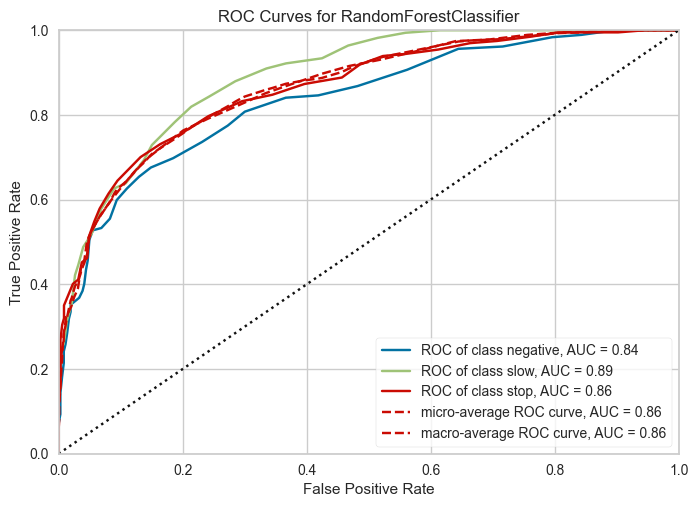

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'negative', 1: 'slow', 2: 'stop'},
       estimator=RandomForestClassifier(n_estimators=50))


In [85]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 50)

model_rf.fit(x_train, y_train)
joblib.dump(model_rf,"model_rf")

y_pred2 = model_rf.predict(x_test)
print("Random Forest Clasifier")
print("Train Accuracy:",model_rf.score(x_train, y_train))
print("Test Accuracy:",model_rf.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2,))
print(plot_ROC_curve(model_rf,x_train, x_test, y_train, y_test))


# KNN

KNN
Train Accuracy: 0.7627351996328591
Test Accuracy: 0.6458715596330276
Precision Score:  0.6458715596330276
Recall Score:  0.6458715596330276
F1 Score:  0.6458715596330276


C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


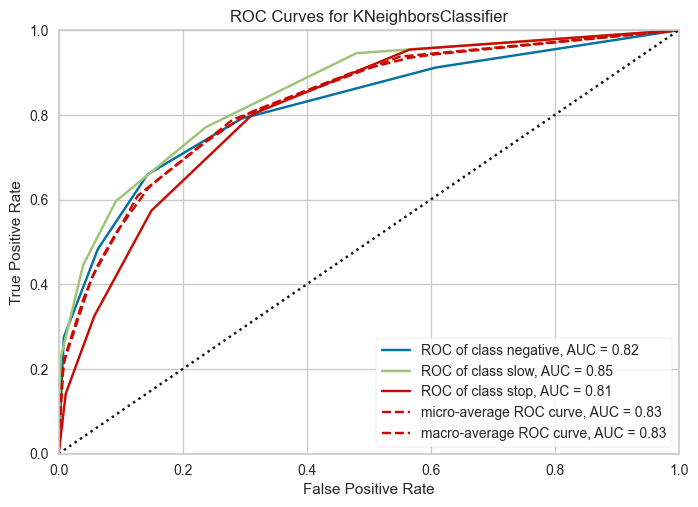

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'negative', 1: 'slow', 2: 'stop'},
       estimator=KNeighborsClassifier())


In [86]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(x_train, y_train)
joblib.dump(model_knn,"model_knn")
y_pred3 = model_knn.predict(x_test)
print("KNN")
print("Train Accuracy:",model_knn.score(x_train, y_train))
print("Test Accuracy:",model_knn.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3, pos_label='positive', average='micro'))
print(plot_ROC_curve(model_knn,x_train, x_test, y_train, y_test))

# SVM LINEAR

SVM Linear kernel
Train Accuracy: 0.6535107847636531
Test Accuracy: 0.6311926605504588
Precision Score:  0.6311926605504588
Recall Score:  0.6311926605504588
F1 Score:  0.6311926605504588


C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


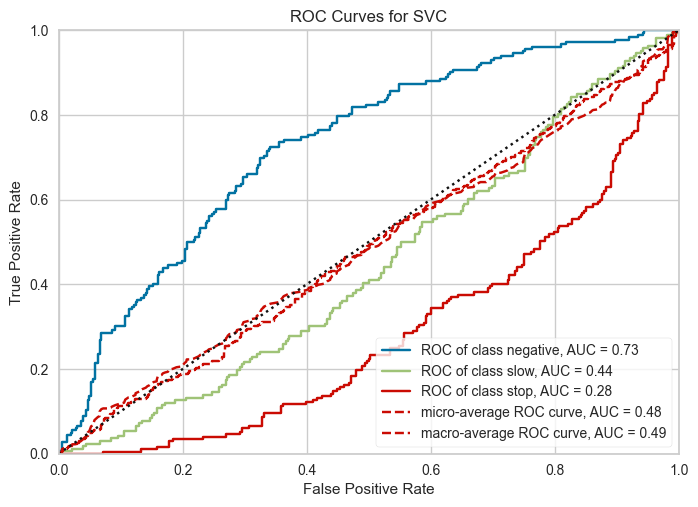

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'negative', 1: 'slow', 2: 'stop'},
       estimator=SVC(C=1, decision_function_shape='ovo', kernel='linear'))


In [87]:
from sklearn import svm
model_svm_l = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')
model_svm_l.fit(x_train, y_train)
joblib.dump(model_svm_l,"model_svm_l")
y_pred4 = model_svm_l.predict(x_test)
print("SVM Linear kernel")
print("Train Accuracy:",model_svm_l.score(x_train, y_train))
print("Test Accuracy:",model_svm_l.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred4, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred4, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred4, pos_label='positive', average='micro'))
print(plot_ROC_curve(model_svm_l,x_train, x_test, y_train, y_test))

# SVM SIGMOID

SVM Sigmoid kernel
Train Accuracy: 0.5534648921523635
Test Accuracy: 0.5724770642201835


C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precision Score:  0.5724770642201835
Recall Score:  0.5724770642201835
F1 Score:  0.5724770642201835


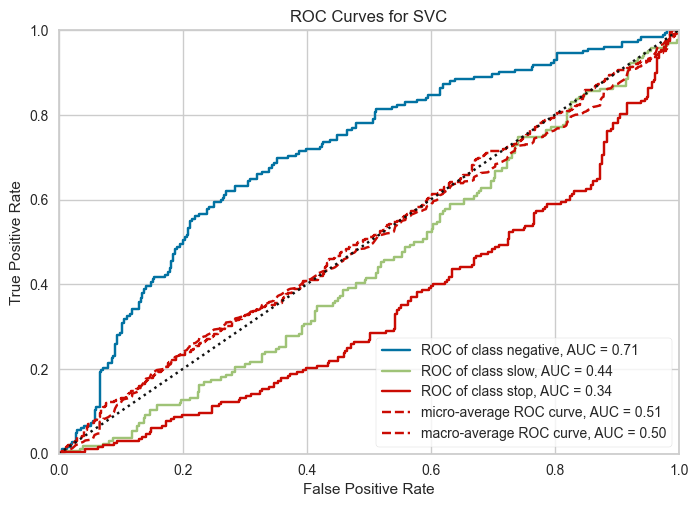

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'negative', 1: 'slow', 2: 'stop'},
       estimator=SVC(C=1, decision_function_shape='ovo', kernel='sigmoid'))


In [88]:
from sklearn import svm
model_svm_s = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo')
model_svm_s.fit(x_train, y_train)
joblib.dump(model_svm_s,"model_svm_s")
y_pred5 = model_svm_s.predict(x_test)
print("SVM Sigmoid kernel")
print("Train Accuracy:",model_svm_s.score(x_train, y_train))
print("Test Accuracy:",model_svm_s.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred5, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred5, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred5, pos_label='positive', average='micro'))
print(plot_ROC_curve(model_svm_s,x_train, x_test, y_train, y_test))

# SVM POLY

SVM Poly kernel
Train Accuracy: 0.8549793483249197
Test Accuracy: 0.6825688073394496
Precision Score:  0.6825688073394496
Recall Score:  0.6825688073394496
F1 Score:  0.6825688073394496


C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


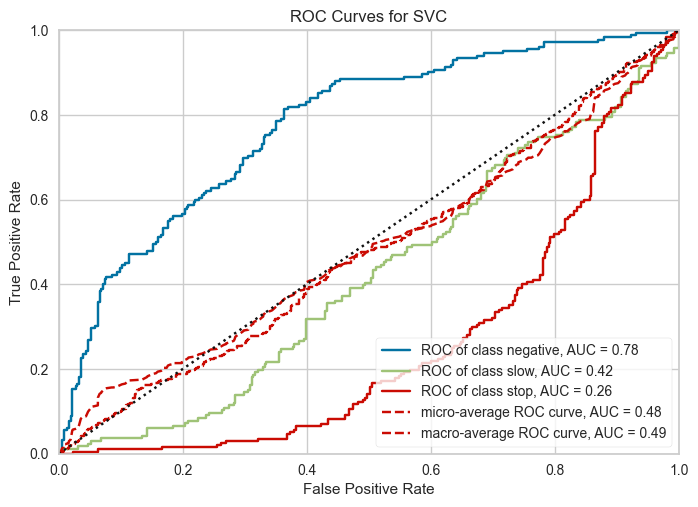

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'negative', 1: 'slow', 2: 'stop'},
       estimator=SVC(C=1, decision_function_shape='ovo', kernel='poly'))


In [89]:
from sklearn import svm
model_svm_p = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo')
model_svm_p.fit(x_train, y_train)
joblib.dump(model_svm_p,"model_svm_p")
y_pred6 = model_svm_p.predict(x_test)
print("SVM Poly kernel")
print("Train Accuracy:",model_svm_p.score(x_train, y_train))
print("Test Accuracy:",model_svm_p.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred6, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred6, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred6, pos_label='positive', average='micro'))
print(plot_ROC_curve(model_svm_p,x_train, x_test, y_train, y_test))

# SVM RBF

SVM RBF kernel
Train Accuracy: 1.0
Test Accuracy: 0.41284403669724773
Precision Score:  0.41284403669724773
Recall Score:  0.41284403669724773
F1 Score:  0.41284403669724773


C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


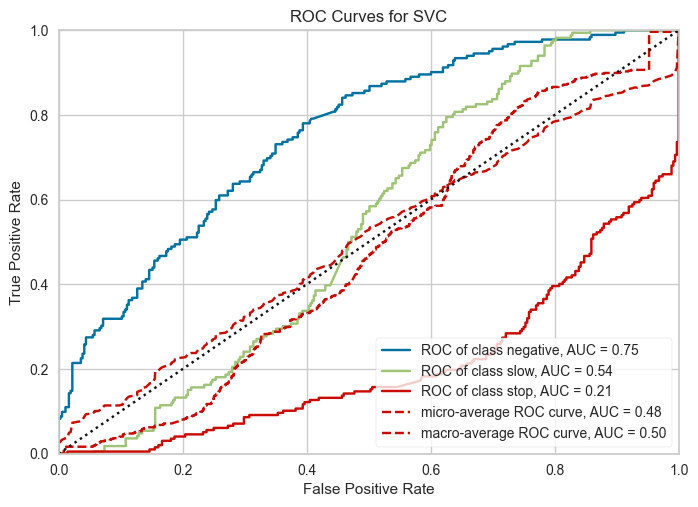

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'negative', 1: 'slow', 2: 'stop'},
       estimator=SVC(C=1, decision_function_shape='ovo', gamma=1))


In [90]:
from sklearn import svm
model_svm_r = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')
model_svm_r.fit(x_train, y_train)
joblib.dump(model_svm_r,"model_svm_r")
y_pred7 = model_svm_r.predict(x_test)
print("SVM RBF kernel")
print("Train Accuracy:",model_svm_r.score(x_train, y_train))
print("Test Accuracy:",model_svm_r.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred7, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred7, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred7, pos_label='positive', average='micro'))
print(plot_ROC_curve(model_svm_r,x_train, x_test, y_train, y_test))

# GAUSSIAN NAIVE BAYES

Gaussian NB
Train Accuracy: 0.6424965580541533
Test Accuracy: 0.6256880733944954
Precision Score:  0.6256880733944954
Recall Score:  0.6256880733944954
F1 Score:  0.6256880733944954


C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


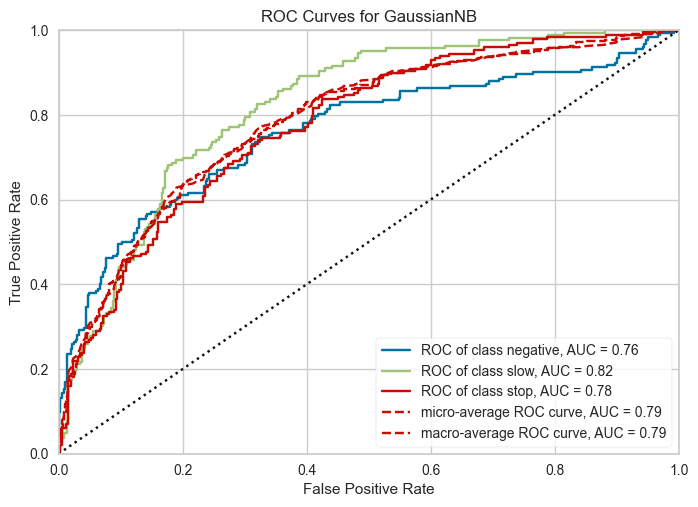

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'negative', 1: 'slow', 2: 'stop'}, estimator=GaussianNB())


In [91]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB().fit(x_train, y_train)
joblib.dump(model_nb,"model_nb")
y_pred8 = model_nb.predict(x_test)
print("Gaussian NB")
print("Train Accuracy:",model_nb.score(x_train, y_train))
print("Test Accuracy:",model_nb.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred8, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred8, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred8, pos_label='positive', average='micro'))
print(plot_ROC_curve(model_nb,x_train, x_test, y_train, y_test))

# VOTING CLASSIFIER

In [92]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier( estimators=[('DT', model_dt ), ('RF', model_rf),('KNN', model_knn), ('SCVP', model_svm_p), 
                                           ('GuassianNB', model_nb)], voting='hard')
model_voting.fit(x_train, y_train)
voting_pred = model_voting.predict(x_test)
joblib.dump(model_voting,"model_voting")
CM = confusion_matrix(y_test, voting_pred)
print("Voting Classifier Hard")
print("Train Accuracy:",model_voting.score(x_train, y_train))
print("Test Accuracy:",model_voting.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, voting_pred,pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, voting_pred,pos_label='positive', average='micro'))
print("F2 Score: ",metrics.fbeta_score(y_test, voting_pred,pos_label='positive', average='micro',beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, voting_pred,pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, voting_pred))

Voting Classifier Hard
Train Accuracy: 0.9380449747590638
Test Accuracy: 0.7321100917431193
Precision Score:  0.7321100917431193
Recall Score:  0.7321100917431193
F2 Score:  0.7321100917431193
F1 Score:  0.7321100917431193
Confusion Matrix: 
[[130  22  30]
 [ 18 123  25]
 [ 26  25 146]]


C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a 

In [93]:
os.getcwd()

'C:\\Users\\20111\\Downloads\\CV Dataset'

# TESTING

# Defining path of folder

In [97]:
folder_acne_t = r"C:\Users\20111\Downloads\CV Dataset\Testing\Acne_test"
folder_scar_t = r"C:\Users\20111\Downloads\CV Dataset\Testing\Scar_test"
folder_pigmentation_t = r"C:\Users\20111\Downloads\CV Dataset\Testing\Pigmentation_test"

In [98]:
kmeans = pickle.load(open(r"C:\Users\20111\Downloads\CV Dataset\Kmeans_BRISK_Model.sav",'rb'))

In [102]:
#performing kmeans prediction of the entire  dataset with the pretrained kmeans model

#initialising i=0; as its the 1st class

i=0
data=[]
c=0

for filename in os.listdir(folder_acne_t):
    #path
    path=os.path.join(folder_acne_t,filename)
    a=cv2.imread(path)

    #resize image
    resize=(100, 100)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
     # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
        
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    print("keypoint length ",c," : ", len(keypoint))
    c=c+1
    if c==2000:
        break
    
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv(r"C:\Users\20111\Downloads\CV Dataset\Testing\Acne_Prediction_B.csv", mode='a',header=False,index=False)

keypoint length  0  :  153
keypoint length  1  :  149
keypoint length  2  :  156
keypoint length  3  :  93
keypoint length  4  :  71
keypoint length  5  :  91
keypoint length  6  :  75
keypoint length  7  :  36
keypoint length  8  :  82
keypoint length  9  :  57
keypoint length  10  :  106
keypoint length  11  :  62
keypoint length  12  :  112
keypoint length  13  :  114
keypoint length  14  :  80
keypoint length  15  :  85
keypoint length  16  :  69
keypoint length  17  :  44
keypoint length  18  :  188
keypoint length  19  :  94
keypoint length  20  :  83
keypoint length  21  :  142
keypoint length  22  :  162
keypoint length  23  :  85
keypoint length  24  :  101
keypoint length  25  :  94
keypoint length  26  :  48
keypoint length  27  :  87
keypoint length  28  :  79
keypoint length  29  :  76
keypoint length  30  :  89
keypoint length  31  :  59
keypoint length  32  :  65
keypoint length  33  :  74
keypoint length  34  :  86
keypoint length  35  :  129
keypoint length  36  :  67


In [103]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder_scar_t):
    path=os.path.join(folder_scar_t,filename)
    a=cv2.imread(path)
    resize=(100, 100)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
     # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
        
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    print("keypoint length ",k," : ", len(keypoint))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv(r"C:\Users\20111\Downloads\CV Dataset\Testing\Scar_Prediction_B.csv", mode='a',header=False,index=False)

keypoint length  0  :  124
keypoint length  1  :  62
keypoint length  2  :  155
keypoint length  3  :  95
keypoint length  4  :  148
keypoint length  5  :  85
keypoint length  6  :  148
keypoint length  7  :  90
keypoint length  8  :  73
keypoint length  9  :  108
keypoint length  10  :  146
keypoint length  11  :  114
keypoint length  12  :  106
keypoint length  13  :  81
keypoint length  14  :  153
keypoint length  15  :  127
keypoint length  16  :  97
keypoint length  17  :  89
keypoint length  18  :  94
keypoint length  19  :  80
keypoint length  20  :  151
keypoint length  21  :  159
keypoint length  22  :  108
keypoint length  23  :  104
keypoint length  24  :  123
keypoint length  25  :  98
keypoint length  26  :  137
keypoint length  27  :  161
keypoint length  28  :  167
keypoint length  29  :  59
keypoint length  30  :  133
keypoint length  31  :  279
keypoint length  32  :  80
keypoint length  33  :  87
keypoint length  34  :  105
keypoint length  35  :  128
keypoint length 

In [104]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=2; as its the 3rd class
i=2
data=[]
k=0
for filename in os.listdir(folder_pigmentation_t):
    path=os.path.join(folder_pigmentation_t,filename)
    a=cv2.imread(path)
    resize=(100, 100)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
     # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
    
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])    
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
        
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    print("keypoint length ",k," : ", len(keypoint))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv(r"C:\Users\20111\Downloads\CV Dataset\Testing\Pigmentation_prediction_B.csv", mode='a',header=False,index=False)

keypoint length  0  :  71
keypoint length  1  :  74
keypoint length  2  :  74
keypoint length  3  :  93
keypoint length  4  :  129
keypoint length  5  :  118
keypoint length  6  :  195
keypoint length  7  :  76
keypoint length  8  :  109
keypoint length  9  :  75
keypoint length  10  :  67
keypoint length  11  :  111
keypoint length  12  :  54
keypoint length  13  :  106
keypoint length  14  :  163
keypoint length  15  :  87
keypoint length  16  :  97
keypoint length  17  :  85
keypoint length  18  :  77
keypoint length  19  :  117
keypoint length  20  :  128
keypoint length  21  :  87
keypoint length  22  :  83
keypoint length  23  :  52
keypoint length  24  :  156
keypoint length  25  :  100
keypoint length  26  :  81
keypoint length  27  :  87
keypoint length  28  :  98
keypoint length  29  :  48
keypoint length  30  :  53
keypoint length  31  :  95
keypoint length  32  :  56
keypoint length  33  :  114
keypoint length  34  :  110
keypoint length  35  :  116
keypoint length  36  :  

In [105]:
#Displaying the kmeans predicted data
print("Acne Images")
dat1_B = pd.read_csv(r"C:\Users\20111\Downloads\CV Dataset\Testing\Acne_Prediction_B.csv",header=None)
print(dat1_B)

Acne Images
          0         1         2         3         4         5         6   \
0   0.078431  0.039216  0.039216  0.045752  0.084967  0.104575  0.058824   
1   0.060403  0.040268  0.046980  0.087248  0.087248  0.067114  0.026846   
2   0.051282  0.051282  0.038462  0.044872  0.096154  0.083333  0.044872   
3   0.064516  0.021505  0.064516  0.064516  0.043011  0.064516  0.064516   
4   0.014085  0.028169  0.070423  0.042254  0.140845  0.169014  0.126761   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.098039  0.049020  0.039216  0.058824  0.058824  0.068627  0.088235   
96  0.065574  0.016393  0.032787  0.032787  0.081967  0.049180  0.081967   
97  0.011494  0.057471  0.022989  0.022989  0.103448  0.045977  0.034483   
98  0.048193  0.012048  0.060241  0.012048  0.072289  0.048193  0.132530   
99  0.052174  0.078261  0.034783  0.069565  0.104348  0.069565  0.069565   

          7         8         9         10        11        12        13  \

In [106]:
print("Scar Images")
dat2_B = pd.read_csv(r"C:\Users\20111\Downloads\CV Dataset\Testing\Scar_Prediction_B.csv",header=None)
print(dat2_B)

Scar Images
          0         1         2         3         4         5         6   \
0   0.104839  0.080645  0.104839  0.072581  0.024194  0.000000  0.048387   
1   0.000000  0.032258  0.225806  0.096774  0.032258  0.064516  0.048387   
2   0.045161  0.058065  0.103226  0.058065  0.064516  0.083871  0.038710   
3   0.021053  0.063158  0.094737  0.042105  0.031579  0.115789  0.063158   
4   0.013514  0.087838  0.168919  0.081081  0.033784  0.094595  0.054054   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.087591  0.043796  0.043796  0.051095  0.072993  0.058394  0.065693   
96  0.016129  0.048387  0.032258  0.080645  0.048387  0.112903  0.064516   
97  0.103448  0.000000  0.034483  0.057471  0.068966  0.034483  0.057471   
98  0.017241  0.017241  0.224138  0.137931  0.017241  0.051724  0.086207   
99  0.018349  0.045872  0.165138  0.045872  0.064220  0.073394  0.064220   

          7         8         9         10        11        12        13  \

In [107]:
print("Skin Pigmentation Images")
dat3_B = pd.read_csv(r"C:\Users\20111\Downloads\CV Dataset\Testing\Pigmentation_prediction_B.csv",header=None)
print(dat3_B)

Skin Pigmentation Images
          0         1         2         3         4         5         6   \
0   0.042254  0.028169  0.028169  0.056338  0.098592  0.028169  0.154930   
1   0.040541  0.094595  0.040541  0.000000  0.081081  0.121622  0.135135   
2   0.040541  0.054054  0.094595  0.054054  0.081081  0.067568  0.027027   
3   0.021505  0.150538  0.107527  0.043011  0.021505  0.053763  0.075269   
4   0.046512  0.085271  0.015504  0.100775  0.054264  0.116279  0.085271   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.037037  0.012346  0.012346  0.074074  0.049383  0.086420  0.185185   
96  0.021739  0.076087  0.043478  0.076087  0.054348  0.130435  0.152174   
97  0.024390  0.024390  0.317073  0.048780  0.024390  0.073171  0.073171   
98  0.054054  0.033784  0.033784  0.074324  0.060811  0.087838  0.067568   
99  0.033708  0.022472  0.067416  0.067416  0.134831  0.022472  0.011236   

          7         8         9         10        11        12

In [108]:
A=dat1_B.append(dat2_B)
A=A.append(dat3_B)
csv_data=A.to_csv(r'C:\Users\20111\Downloads\CV Dataset\Testing\FinalBRISK.csv', mode='a',header=False,index=False)

C:\Users\20111\AppData\Local\Temp\ipykernel_13664\2189756332.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  A=dat1_B.append(dat2_B)
C:\Users\20111\AppData\Local\Temp\ipykernel_13664\2189756332.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  A=A.append(dat3_B)


In [109]:
brisk_t = pd.read_csv(r'C:\Users\20111\Downloads\CV Dataset\Testing\FinalBRISK.csv',header=None)
brisk_t

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.078431,0.039216,0.039216,0.045752,0.084967,0.104575,0.058824,0.091503,0.130719,0.019608,0.039216,0.032680,0.065359,0.045752,0.091503,0.032680,0
1,0.060403,0.040268,0.046980,0.087248,0.087248,0.067114,0.026846,0.087248,0.040268,0.040268,0.046980,0.053691,0.120805,0.060403,0.060403,0.073826,0
2,0.051282,0.051282,0.038462,0.044872,0.096154,0.083333,0.044872,0.076923,0.128205,0.032051,0.025641,0.051282,0.057692,0.057692,0.096154,0.064103,0
3,0.064516,0.021505,0.064516,0.064516,0.043011,0.064516,0.064516,0.053763,0.075269,0.064516,0.118280,0.053763,0.053763,0.086022,0.086022,0.021505,0
4,0.014085,0.028169,0.070423,0.042254,0.140845,0.169014,0.126761,0.028169,0.014085,0.084507,0.056338,0.056338,0.028169,0.070423,0.056338,0.014085,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.037037,0.012346,0.012346,0.074074,0.049383,0.086420,0.185185,0.111111,0.086420,0.037037,0.049383,0.098765,0.049383,0.061728,0.037037,0.012346,2
296,0.021739,0.076087,0.043478,0.076087,0.054348,0.130435,0.152174,0.108696,0.021739,0.000000,0.065217,0.065217,0.054348,0.065217,0.021739,0.043478,2
297,0.024390,0.024390,0.317073,0.048780,0.024390,0.073171,0.073171,0.048780,0.000000,0.073171,0.024390,0.048780,0.073171,0.000000,0.024390,0.121951,2
298,0.054054,0.033784,0.033784,0.074324,0.060811,0.087838,0.067568,0.081081,0.067568,0.101351,0.054054,0.054054,0.020270,0.047297,0.067568,0.094595,2


# FREAK

# Loading freak kmeans model

In [110]:
kmeans_f = pickle.load(open(r"C:\Users\20111\Downloads\CV Dataset\Kmeans_FREAK_Model.sav",'rb'))

In [112]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=0; as its the first class
i=0
data=[]
c=0

for filename in os.listdir(folder_acne_t):
    #path
    path=os.path.join(folder_acne_t,filename)
    a=cv2.imread(path)

    #resize image
    resize=(150, 150)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
    # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    brisk = cv2.BRISK_create()
    keypoints,d = brisk.detectAndCompute(img_prewitt,None)
        
    #initialise descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.compute(gray, keypoints)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans_f.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoints))
    print("keypoint length ",c," : ",len(keypoints))
    c=c+1
    if c==2000:
        break
    
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv(r'C:\Users\20111\Downloads\CV Dataset\Testing\Acne_Prediction_F.csv', mode='a',header=False,index=False)

keypoint length  0  :  414
keypoint length  1  :  407
keypoint length  2  :  430
keypoint length  3  :  167
keypoint length  4  :  160
keypoint length  5  :  172
keypoint length  6  :  146
keypoint length  7  :  99
keypoint length  8  :  180
keypoint length  9  :  136
keypoint length  10  :  198
keypoint length  11  :  155
keypoint length  12  :  248
keypoint length  13  :  254
keypoint length  14  :  153
keypoint length  15  :  232
keypoint length  16  :  187
keypoint length  17  :  107
keypoint length  18  :  500
keypoint length  19  :  229
keypoint length  20  :  187
keypoint length  21  :  360
keypoint length  22  :  406
keypoint length  23  :  182
keypoint length  24  :  231
keypoint length  25  :  273
keypoint length  26  :  94
keypoint length  27  :  194
keypoint length  28  :  168
keypoint length  29  :  211
keypoint length  30  :  191
keypoint length  31  :  142
keypoint length  32  :  131
keypoint length  33  :  193
keypoint length  34  :  238
keypoint length  35  :  263
keyp

In [113]:
#performing kmeans prediction of the entire  dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder_scar_t):
    path=os.path.join(folder_scar_t,filename)
    a=cv2.imread(path)
    resize=(150, 150)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
    # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    brisk = cv2.BRISK_create()
    keypoints,d = brisk.detectAndCompute(img_prewitt,None)
        
    #initialise descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.compute(gray, keypoints)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans_f.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoints))
    print("keypoint length ",k," : ",len(keypoints))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv(r'C:\Users\20111\Downloads\CV Dataset\Testing\Scar_prediction_F.csv', mode='a',header=False,index=False)

keypoint length  0  :  287
keypoint length  1  :  149
keypoint length  2  :  431
keypoint length  3  :  286
keypoint length  4  :  396
keypoint length  5  :  243
keypoint length  6  :  340
keypoint length  7  :  221
keypoint length  8  :  209
keypoint length  9  :  296
keypoint length  10  :  345
keypoint length  11  :  319
keypoint length  12  :  326
keypoint length  13  :  211
keypoint length  14  :  411
keypoint length  15  :  368
keypoint length  16  :  205
keypoint length  17  :  229
keypoint length  18  :  219
keypoint length  19  :  243
keypoint length  20  :  370
keypoint length  21  :  392
keypoint length  22  :  301
keypoint length  23  :  284
keypoint length  24  :  320
keypoint length  25  :  250
keypoint length  26  :  461
keypoint length  27  :  452
keypoint length  28  :  427
keypoint length  29  :  174
keypoint length  30  :  371
keypoint length  31  :  795
keypoint length  32  :  183
keypoint length  33  :  209
keypoint length  34  :  228
keypoint length  35  :  332
ke

In [115]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=2; as its the 3rd class
i=2
data=[]
k=0
for filename in os.listdir(folder_pigmentation_t):
    path=os.path.join(folder_pigmentation_t,filename)
    a=cv2.imread(path)
    resize=(150, 150)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
    # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    brisk = cv2.BRISK_create()
    keypoints,d = brisk.detectAndCompute(img_prewitt,None)
        
    #initialise descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.compute(gray, keypoints)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans_f.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoints))
    print("keypoint length ",k," : ",len(keypoints))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv(r'C:\Users\20111\Downloads\CV Dataset\Testing\Pigmentation_prediction_F.csv', mode='a',header=False,index=False)

keypoint length  0  :  174
keypoint length  1  :  200
keypoint length  2  :  225
keypoint length  3  :  223
keypoint length  4  :  378
keypoint length  5  :  264
keypoint length  6  :  565
keypoint length  7  :  206
keypoint length  8  :  313
keypoint length  9  :  182
keypoint length  10  :  148
keypoint length  11  :  247
keypoint length  12  :  158
keypoint length  13  :  283
keypoint length  14  :  441
keypoint length  15  :  202
keypoint length  16  :  258
keypoint length  17  :  232
keypoint length  18  :  161
keypoint length  19  :  263
keypoint length  20  :  314
keypoint length  21  :  206
keypoint length  22  :  256
keypoint length  23  :  117
keypoint length  24  :  389
keypoint length  25  :  257
keypoint length  26  :  211
keypoint length  27  :  214
keypoint length  28  :  239
keypoint length  29  :  104
keypoint length  30  :  122
keypoint length  31  :  223
keypoint length  32  :  159
keypoint length  33  :  308
keypoint length  34  :  335
keypoint length  35  :  242
ke

In [116]:
#Displaying the kmeans predicted data
print("Acne Images")
dat1_f_t = pd.read_csv(r"C:\Users\20111\Downloads\CV Dataset\Testing\Acne_Prediction_F.csv",header=None)
print(dat1_f_t)

Acne Images
          0         1         2         3         4         5         6   \
0   0.000000  0.004831  0.050725  0.084541  0.108696  0.103865  0.004831   
1   0.000000  0.012285  0.066339  0.066339  0.081081  0.071253  0.017199   
2   0.004651  0.004651  0.041860  0.100000  0.100000  0.106977  0.011628   
3   0.000000  0.000000  0.029940  0.095808  0.167665  0.113772  0.053892   
4   0.000000  0.006250  0.081250  0.131250  0.050000  0.231250  0.018750   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.034483  0.051724  0.081897  0.056034  0.008621  0.051724  0.025862   
96  0.000000  0.009804  0.009804  0.068627  0.029412  0.127451  0.000000   
97  0.042056  0.065421  0.102804  0.014019  0.042056  0.028037  0.000000   
98  0.010363  0.093264  0.129534  0.046632  0.000000  0.031088  0.010363   
99  0.000000  0.113712  0.127090  0.000000  0.006689  0.006689  0.003344   

          7         8         9         10        11        12        13  \

In [117]:
print("Scar Images")
dat2_f = pd.read_csv(r"C:\Users\20111\Downloads\CV Dataset\Testing\Scar_prediction_F.csv",header=None)
print(dat2_f)

Scar Images
          0         1         2         3         4         5         6   \
0   0.000000  0.020906  0.024390  0.101045  0.149826  0.104530  0.000000   
1   0.000000  0.000000  0.000000  0.040268  0.000000  0.255034  0.000000   
2   0.000000  0.002320  0.023202  0.178654  0.004640  0.197216  0.006961   
3   0.000000  0.069930  0.000000  0.090909  0.000000  0.188811  0.024476   
4   0.000000  0.025253  0.007576  0.121212  0.007576  0.159091  0.025253   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.002625  0.023622  0.049869  0.078740  0.005249  0.055118  0.005249   
96  0.000000  0.086705  0.023121  0.080925  0.080925  0.057803  0.005780   
97  0.000000  0.229787  0.148936  0.004255  0.059574  0.012766  0.000000   
98  0.000000  0.000000  0.000000  0.093750  0.062500  0.179688  0.000000   
99  0.000000  0.003663  0.003663  0.186813  0.139194  0.230769  0.010989   

          7         8         9         10        11        12        13  \

In [118]:
print("Skin Pigmentation Images")
dat3_f = pd.read_csv(r"C:\Users\20111\Downloads\CV Dataset\Testing\Pigmentation_prediction_F.csv",header=None)
print(dat3_f)

Skin Pigmentation Images
          0         1         2         3         4         5         6   \
0   0.000000  0.040230  0.040230  0.068966  0.000000  0.166667  0.034483   
1   0.005000  0.035000  0.055000  0.035000  0.150000  0.055000  0.000000   
2   0.008889  0.022222  0.084444  0.066667  0.115556  0.057778  0.008889   
3   0.008969  0.062780  0.071749  0.013453  0.040359  0.022422  0.000000   
4   0.002646  0.007937  0.023810  0.134921  0.084656  0.182540  0.000000   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.000000  0.000000  0.028409  0.085227  0.017045  0.210227  0.005682   
96  0.000000  0.005181  0.036269  0.098446  0.000000  0.119171  0.010363   
97  0.010417  0.000000  0.072917  0.031250  0.020833  0.166667  0.020833   
98  0.022500  0.007500  0.030000  0.082500  0.087500  0.130000  0.017500   
99  0.015267  0.061069  0.103053  0.026718  0.011450  0.095420  0.015267   

          7         8         9         10        11        12

In [119]:
B=dat1_f_t.append(dat2_f)
B=B.append(dat3_f)
csv_data_f=B.to_csv(r'C:\Users\20111\Downloads\CV Dataset\Testing\FinalFREAK.csv', mode='a',header=False,index=False)

C:\Users\20111\AppData\Local\Temp\ipykernel_13664\260552206.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  B=dat1_f_t.append(dat2_f)
C:\Users\20111\AppData\Local\Temp\ipykernel_13664\260552206.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  B=B.append(dat3_f)


In [120]:
B

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000000,0.004831,0.050725,0.084541,0.108696,0.103865,0.004831,0.004831,0.111111,0.231884,0.079710,0.028986,0.028986,0.091787,0.065217,0
1,0.000000,0.012285,0.066339,0.066339,0.081081,0.071253,0.017199,0.007371,0.085995,0.243243,0.058968,0.014742,0.041769,0.100737,0.132678,0
2,0.004651,0.004651,0.041860,0.100000,0.100000,0.106977,0.011628,0.006977,0.116279,0.237209,0.072093,0.025581,0.032558,0.086047,0.053488,0
3,0.000000,0.000000,0.029940,0.095808,0.167665,0.113772,0.053892,0.017964,0.023952,0.035928,0.281437,0.000000,0.125749,0.035928,0.017964,0
4,0.000000,0.006250,0.081250,0.131250,0.050000,0.231250,0.018750,0.012500,0.043750,0.031250,0.218750,0.000000,0.131250,0.006250,0.037500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.028409,0.085227,0.017045,0.210227,0.005682,0.000000,0.102273,0.255682,0.130682,0.039773,0.068182,0.039773,0.017045,2
96,0.000000,0.005181,0.036269,0.098446,0.000000,0.119171,0.010363,0.000000,0.119171,0.207254,0.124352,0.025907,0.108808,0.129534,0.015544,2
97,0.010417,0.000000,0.072917,0.031250,0.020833,0.166667,0.020833,0.000000,0.187500,0.270833,0.104167,0.000000,0.052083,0.052083,0.010417,2
98,0.022500,0.007500,0.030000,0.082500,0.087500,0.130000,0.017500,0.000000,0.047500,0.105000,0.200000,0.020000,0.090000,0.075000,0.085000,2


# COMBINING BRISK AND FREAK

In [121]:
pd1=pd.read_csv(r'C:\Users\20111\Downloads\CV Dataset\Testing\FinalBRISK.csv',header=None)
pd2=pd.read_csv(r'C:\Users\20111\Downloads\CV Dataset\Testing\FinalFREAK.csv',header=None)
df1=pd.DataFrame(pd1)
df1 = df1.iloc[: , :-1]
df2=pd.DataFrame(pd2)

In [122]:
fpd=pd.concat([df1, df2], axis=1)
csv_data=fpd.to_csv(r'C:\Users\20111\Downloads\CV Dataset\Testing\FinalPretrainedBriskFreak.csv', mode='w',header=False,index=False)

In [123]:
test_data = pd.read_csv(r'C:\Users\20111\Downloads\CV Dataset\Testing\FinalPretrainedBriskFreak.csv',header=None)

In [124]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.078431,0.039216,0.039216,0.045752,0.084967,0.104575,0.058824,0.091503,0.130719,0.019608,...,0.004831,0.004831,0.111111,0.231884,0.079710,0.028986,0.028986,0.091787,0.065217,0
1,0.060403,0.040268,0.046980,0.087248,0.087248,0.067114,0.026846,0.087248,0.040268,0.040268,...,0.017199,0.007371,0.085995,0.243243,0.058968,0.014742,0.041769,0.100737,0.132678,0
2,0.051282,0.051282,0.038462,0.044872,0.096154,0.083333,0.044872,0.076923,0.128205,0.032051,...,0.011628,0.006977,0.116279,0.237209,0.072093,0.025581,0.032558,0.086047,0.053488,0
3,0.064516,0.021505,0.064516,0.064516,0.043011,0.064516,0.064516,0.053763,0.075269,0.064516,...,0.053892,0.017964,0.023952,0.035928,0.281437,0.000000,0.125749,0.035928,0.017964,0
4,0.014085,0.028169,0.070423,0.042254,0.140845,0.169014,0.126761,0.028169,0.014085,0.084507,...,0.018750,0.012500,0.043750,0.031250,0.218750,0.000000,0.131250,0.006250,0.037500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.037037,0.012346,0.012346,0.074074,0.049383,0.086420,0.185185,0.111111,0.086420,0.037037,...,0.005682,0.000000,0.102273,0.255682,0.130682,0.039773,0.068182,0.039773,0.017045,2
296,0.021739,0.076087,0.043478,0.076087,0.054348,0.130435,0.152174,0.108696,0.021739,0.000000,...,0.010363,0.000000,0.119171,0.207254,0.124352,0.025907,0.108808,0.129534,0.015544,2
297,0.024390,0.024390,0.317073,0.048780,0.024390,0.073171,0.073171,0.048780,0.000000,0.073171,...,0.020833,0.000000,0.187500,0.270833,0.104167,0.000000,0.052083,0.052083,0.010417,2
298,0.054054,0.033784,0.033784,0.074324,0.060811,0.087838,0.067568,0.081081,0.067568,0.101351,...,0.017500,0.000000,0.047500,0.105000,0.200000,0.020000,0.090000,0.075000,0.085000,2


In [125]:
x = test_data.iloc[:,0:31].values

In [126]:
x

array([[0.07843137, 0.03921569, 0.03921569, ..., 0.02898551, 0.09178744,
        0.06521739],
       [0.06040268, 0.04026846, 0.04697987, ..., 0.04176904, 0.1007371 ,
        0.13267813],
       [0.05128205, 0.05128205, 0.03846154, ..., 0.03255814, 0.08604651,
        0.05348837],
       ...,
       [0.02439024, 0.02439024, 0.31707317, ..., 0.05208333, 0.05208333,
        0.01041667],
       [0.05405405, 0.03378378, 0.03378378, ..., 0.09      , 0.075     ,
        0.085     ],
       [0.03370787, 0.02247191, 0.06741573, ..., 0.07251908, 0.13358779,
        0.07633588]])

In [127]:
y = test_data.iloc[:,31].values

In [128]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

# USING PCA FOR DIMENSIONALITY REDUCTION

In [129]:
from sklearn.preprocessing import StandardScaler
ScalerS = StandardScaler()
Scaler = ScalerS.fit_transform(x)

In [130]:
Scaler

array([[ 9.11159939e-01, -6.91755780e-01, -5.41556299e-01, ...,
        -9.67723883e-01, -1.80143630e-01, -6.46313063e-02],
       [ 3.04488747e-01, -6.60156531e-01, -4.11642684e-01, ...,
        -6.56446804e-01, -3.47764627e-02,  1.35781335e+00],
       [-2.42351800e-03, -3.29579778e-01, -5.54175027e-01, ...,
        -8.80730842e-01, -2.73392125e-01, -3.11943748e-01],
       ...,
       [-9.07341550e-01, -1.13674642e+00,  4.10767552e+00, ...,
        -4.05295408e-01, -8.25047762e-01, -1.22013295e+00],
       [ 9.08552734e-02, -8.54796159e-01, -6.32445245e-01, ...,
         5.17969532e-01, -4.52817924e-01,  3.52495239e-01],
       [-5.93800575e-01, -1.19432585e+00, -6.97009436e-02, ...,
         9.23119441e-02,  4.98809225e-01,  1.69807738e-01]])

In [131]:
pca = pickle.load(open(r"C:\Users\20111\Downloads\CV Dataset\PCA_Model.sav",'rb'))

In [132]:
pcScaler = pca.transform(Scaler)

In [133]:
pcScaler

array([[-0.45032292, -1.11421676,  0.01980941, ..., -0.39354184,
         0.56771068,  0.60851775],
       [-1.3708767 , -1.22598738,  0.55490329, ..., -0.87150872,
         0.99716213,  0.27447931],
       [-0.20399076, -1.45196274,  0.67593671, ..., -0.43978931,
         0.72683203,  0.5621376 ],
       ...,
       [ 1.06891636,  2.15554395,  3.00891967, ...,  0.05623403,
         1.04118123, -0.0222118 ],
       [ 1.55245778, -0.34758309, -0.3075182 , ..., -0.26736414,
        -0.04926534, -0.63457966],
       [-1.37057596, -1.18667911, -0.35887521, ..., -0.57049577,
        -0.44736877,  0.89790575]])

In [134]:
B1= pd.DataFrame(pcScaler)
B1

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.450323,-1.114217,0.019809,0.324808,0.900555,1.119731,-1.056182,-0.535593,0.549677,-0.601692,...,-0.465788,0.362790,-0.254063,-0.203384,-1.363010,-0.246355,0.094418,-0.393542,0.567711,0.608518
1,-1.370877,-1.225987,0.554903,-0.628015,0.703932,0.462601,0.605917,0.312444,0.453082,-0.362107,...,-0.239473,-0.395590,-0.137719,0.251783,0.430641,-0.027733,0.767963,-0.871509,0.997162,0.274479
2,-0.203991,-1.451963,0.675937,0.339971,-0.012020,1.099909,-0.556736,-0.537641,0.440545,-0.840023,...,-0.840351,0.778212,-0.642511,0.092888,-1.400336,0.194573,0.294619,-0.439789,0.726832,0.562138
3,3.328333,-1.169121,-2.391347,1.410749,0.469447,-1.682409,-1.476134,-1.093111,1.053215,0.201586,...,-1.298029,0.639218,-0.552363,-0.664644,0.100197,-0.662133,-1.248845,-0.214656,0.200706,-1.533855
4,3.470761,0.954903,-1.947715,0.979797,1.384245,1.244685,0.862295,1.320762,0.457910,-0.356278,...,-2.163423,0.007244,-0.221557,-0.903480,0.402803,-0.749224,-0.104971,-0.727267,0.624796,0.392794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.672845,0.216982,-1.156015,-0.692193,2.292197,0.565373,-0.922520,1.098896,1.802044,-1.018804,...,0.948974,0.620266,-0.791740,-0.165889,-0.473535,0.917260,0.219539,-0.545771,0.338704,0.674504
296,1.253477,1.535113,-1.546380,-1.026639,1.466919,0.883870,1.418694,0.448300,0.968653,-0.663494,...,1.097026,-0.043035,-0.137050,1.109952,-0.027261,0.189686,-0.702728,-0.290464,0.042710,-0.024290
297,1.068916,2.155544,3.008920,-0.745283,-0.072140,0.569164,-0.613071,0.211807,1.260593,-1.131844,...,0.316013,0.885911,3.506638,2.328320,0.678589,0.541943,0.749028,0.056234,1.041181,-0.022212
298,1.552458,-0.347583,-0.307518,2.153723,-0.297586,0.827274,-0.873437,-0.047700,-0.467814,-0.324025,...,-0.420706,0.020093,-0.701497,0.217188,0.923514,-0.052035,0.314041,-0.267364,-0.049265,-0.634580


In [135]:
B2=pd.concat([B1, pd.DataFrame(y)],axis=1)
B2

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,0
0,-0.450323,-1.114217,0.019809,0.324808,0.900555,1.119731,-1.056182,-0.535593,0.549677,-0.601692,...,0.362790,-0.254063,-0.203384,-1.363010,-0.246355,0.094418,-0.393542,0.567711,0.608518,0
1,-1.370877,-1.225987,0.554903,-0.628015,0.703932,0.462601,0.605917,0.312444,0.453082,-0.362107,...,-0.395590,-0.137719,0.251783,0.430641,-0.027733,0.767963,-0.871509,0.997162,0.274479,0
2,-0.203991,-1.451963,0.675937,0.339971,-0.012020,1.099909,-0.556736,-0.537641,0.440545,-0.840023,...,0.778212,-0.642511,0.092888,-1.400336,0.194573,0.294619,-0.439789,0.726832,0.562138,0
3,3.328333,-1.169121,-2.391347,1.410749,0.469447,-1.682409,-1.476134,-1.093111,1.053215,0.201586,...,0.639218,-0.552363,-0.664644,0.100197,-0.662133,-1.248845,-0.214656,0.200706,-1.533855,0
4,3.470761,0.954903,-1.947715,0.979797,1.384245,1.244685,0.862295,1.320762,0.457910,-0.356278,...,0.007244,-0.221557,-0.903480,0.402803,-0.749224,-0.104971,-0.727267,0.624796,0.392794,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.672845,0.216982,-1.156015,-0.692193,2.292197,0.565373,-0.922520,1.098896,1.802044,-1.018804,...,0.620266,-0.791740,-0.165889,-0.473535,0.917260,0.219539,-0.545771,0.338704,0.674504,2
296,1.253477,1.535113,-1.546380,-1.026639,1.466919,0.883870,1.418694,0.448300,0.968653,-0.663494,...,-0.043035,-0.137050,1.109952,-0.027261,0.189686,-0.702728,-0.290464,0.042710,-0.024290,2
297,1.068916,2.155544,3.008920,-0.745283,-0.072140,0.569164,-0.613071,0.211807,1.260593,-1.131844,...,0.885911,3.506638,2.328320,0.678589,0.541943,0.749028,0.056234,1.041181,-0.022212,2
298,1.552458,-0.347583,-0.307518,2.153723,-0.297586,0.827274,-0.873437,-0.047700,-0.467814,-0.324025,...,0.020093,-0.701497,0.217188,0.923514,-0.052035,0.314041,-0.267364,-0.049265,-0.634580,2


In [137]:
pca = pickle.load(open(r"C:\Users\20111\Downloads\CV Dataset\PCA_Model.sav",'rb'))

In [138]:
csv_data_t1=B2.to_csv(r'C:\Users\20111\Downloads\CV Dataset\Testing\FinalPCAFV.csv', mode='a',header=False,index=False)

In [139]:
data2= pd.read_csv(r'C:\Users\20111\Downloads\CV Dataset\Testing\FinalPCAFV.csv',header=None)
data2

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.450323,-1.114217,0.019809,0.324808,0.900555,1.119731,-1.056182,-0.535593,0.549677,-0.601692,...,0.362790,-0.254063,-0.203384,-1.363010,-0.246355,0.094418,-0.393542,0.567711,0.608518,0
1,-1.370877,-1.225987,0.554903,-0.628015,0.703932,0.462601,0.605917,0.312444,0.453082,-0.362107,...,-0.395590,-0.137719,0.251783,0.430641,-0.027733,0.767963,-0.871509,0.997162,0.274479,0
2,-0.203991,-1.451963,0.675937,0.339971,-0.012020,1.099909,-0.556736,-0.537641,0.440545,-0.840023,...,0.778212,-0.642511,0.092888,-1.400336,0.194573,0.294619,-0.439789,0.726832,0.562138,0
3,3.328333,-1.169121,-2.391347,1.410749,0.469447,-1.682409,-1.476134,-1.093111,1.053215,0.201586,...,0.639218,-0.552363,-0.664644,0.100197,-0.662133,-1.248845,-0.214656,0.200706,-1.533855,0
4,3.470761,0.954903,-1.947715,0.979797,1.384245,1.244685,0.862295,1.320762,0.457910,-0.356278,...,0.007244,-0.221557,-0.903480,0.402803,-0.749224,-0.104971,-0.727267,0.624796,0.392794,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.672845,0.216982,-1.156015,-0.692193,2.292197,0.565373,-0.922520,1.098896,1.802044,-1.018804,...,0.620266,-0.791740,-0.165889,-0.473535,0.917260,0.219539,-0.545771,0.338704,0.674504,2
296,1.253477,1.535113,-1.546380,-1.026639,1.466919,0.883870,1.418694,0.448300,0.968653,-0.663494,...,-0.043035,-0.137050,1.109952,-0.027261,0.189686,-0.702728,-0.290464,0.042710,-0.024290,2
297,1.068916,2.155544,3.008920,-0.745283,-0.072140,0.569164,-0.613071,0.211807,1.260593,-1.131844,...,0.885911,3.506638,2.328320,0.678589,0.541943,0.749028,0.056234,1.041181,-0.022212,2
298,1.552458,-0.347583,-0.307518,2.153723,-0.297586,0.827274,-0.873437,-0.047700,-0.467814,-0.324025,...,0.020093,-0.701497,0.217188,0.923514,-0.052035,0.314041,-0.267364,-0.049265,-0.634580,2


In [140]:
#assigning x the columns from 1 to 28 for training
x1 = data2.iloc[:,0:28].values
print("X values")
print(x1)

#assigning y with the column "Class" as target variable
y1 = data2.iloc[:,28]
print("Y values")
print(y1)

X values
[[-0.45032292 -1.11421676  0.01980941 ... -0.39354184  0.56771068
   0.60851775]
 [-1.3708767  -1.22598738  0.55490329 ... -0.87150872  0.99716213
   0.27447931]
 [-0.20399076 -1.45196274  0.67593671 ... -0.43978931  0.72683203
   0.5621376 ]
 ...
 [ 1.06891636  2.15554395  3.00891967 ...  0.05623403  1.04118123
  -0.0222118 ]
 [ 1.55245778 -0.34758309 -0.3075182  ... -0.26736414 -0.04926534
  -0.63457966]
 [-1.37057596 -1.18667911 -0.35887521 ... -0.57049577 -0.44736877
   0.89790575]]
Y values
0      0
1      0
2      0
3      0
4      0
      ..
295    2
296    2
297    2
298    2
299    2
Name: 28, Length: 300, dtype: int64


In [141]:
import joblib

# Decision Tree

In [ ]:
model_dt = joblib.load(r"C:\Users\20111\Downloads\CV Dataset\model_dt")
y_dt = model_dt.predict(x1)
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y1, y_dt)*100,"%")

# Random Forest

In [145]:
model_rf = joblib.load(r"C:\Users\20111\Downloads\CV Dataset\model_rf")
y_rf = model_rf.predict(x1)
print("Random Forest Clasifier")
print("Random Forest Clasifier: ",accuracy_score(y1, y_rf)*100,"%")
print("Precision Score: ",metrics.precision_score(y1, y_rf, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y1, y_rf, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y1, y_rf, pos_label='positive', average='micro'))

Random Forest Clasifier
Random Forest Clasifier:  64.33333333333333 %
Precision Score:  0.6433333333333333
Recall Score:  0.6433333333333333
F1 Score:  0.6433333333333333


C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# KNN

In [146]:
model_knn = joblib.load(r"C:\Users\20111\Downloads\CV Dataset\model_knn")
y_knn = model_knn.predict(x1)
print("KNN")
print("KNN: ",accuracy_score(y1, y_knn)*100,"%")
print("Precision Score: ",metrics.precision_score(y1, y_knn, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y1, y_knn, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y1, y_knn, pos_label='positive', average='micro'))

KNN
KNN:  56.333333333333336 %
Precision Score:  0.5633333333333334
Recall Score:  0.5633333333333334
F1 Score:  0.5633333333333334


C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# SVM Linear

In [147]:
model_svm = joblib.load(r"C:\Users\20111\Downloads\CV Dataset\model_svm_l")
y_svm = model_svm.predict(x1)
print("SVM")
print("SVM: ",accuracy_score(y1, y_svm)*100,"%")
print("Precision Score: ",metrics.precision_score(y1, y_svm, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y1, y_svm, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y1, y_svm, pos_label='positive', average='micro'))

SVM
SVM:  61.66666666666667 %
Precision Score:  0.6166666666666667
Recall Score:  0.6166666666666667
F1 Score:  0.6166666666666667


C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# SVM Sigmoid

In [148]:
model_svm_s = joblib.load(r"C:\Users\20111\Downloads\CV Dataset\model_svm_s")
y_svm_s = model_svm_s.predict(x1)
print("SVM")
print("SVM: ",accuracy_score(y1, y_svm_s)*100,"%")
print("Precision Score: ",metrics.precision_score(y1, y_svm_s, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y1, y_svm_s, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y1, y_svm_s, pos_label='positive', average='micro'))

SVM
SVM:  52.0 %
Precision Score:  0.52
Recall Score:  0.52
F1 Score:  0.52


C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# SVM Poly

In [149]:
model_svm_p = joblib.load(r"C:\Users\20111\Downloads\CV Dataset\model_svm_p")
y_svm_p = model_svm_p.predict(x1)
print("SVM")
print("SVM: ",accuracy_score(y1, y_svm_p)*100,"%")
print("Precision Score: ",metrics.precision_score(y1, y_svm_p, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y1, y_svm_p, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y1, y_svm_p, pos_label='positive', average='micro'))

SVM
SVM:  63.66666666666667 %
Precision Score:  0.6366666666666667
Recall Score:  0.6366666666666667
F1 Score:  0.6366666666666667


C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# SVM RBF

In [150]:
model_svm_r = joblib.load(r"C:\Users\20111\Downloads\CV Dataset\model_svm_r")
y_svm_r = model_svm_r.predict(x1)
print("SVM")
print("SVM: ",accuracy_score(y1, y_svm_r)*100,"%")
print("Precision Score: ",metrics.precision_score(y1, y_svm_r, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y1, y_svm_r, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y1, y_svm_r, pos_label='positive', average='micro'))
import pickle 
pickle_out = open("model_svm_r.pkl","wb")
pickle.dump(model_svm_r,pickle_out)
pickle_out.close()

SVM
SVM:  33.33333333333333 %
Precision Score:  0.3333333333333333
Recall Score:  0.3333333333333333
F1 Score:  0.3333333333333333


C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# Gaussian Naive Bayes

In [151]:
model_nb = joblib.load(r"C:\Users\20111\Downloads\CV Dataset\model_nb")
y_nb = model_nb.predict(x1)
print("Guassian NB")
print("Guassian NB: ",accuracy_score(y1, y_nb)*100,"%")
print("Precision Score: ",metrics.precision_score(y1, y_nb, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y1, y_nb, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y1, y_nb, pos_label='positive', average='micro'))

Guassian NB
Guassian NB:  59.333333333333336 %
Precision Score:  0.5933333333333334
Recall Score:  0.5933333333333334
F1 Score:  0.5933333333333334


C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# Voting Classifier

In [152]:
model_voting = joblib.load(r"C:\Users\20111\Downloads\CV Dataset\model_voting")
y_voting = model_voting.predict(x1)
print("Voting")
print("Voting: ",accuracy_score(y1, y_voting)*100,"%")
print("Precision Score: ",metrics.precision_score(y1, y_voting, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y1, y_voting, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y1, y_voting, pos_label='positive', average='micro'))

Voting
Voting:  60.66666666666667 %
Precision Score:  0.6066666666666667
Recall Score:  0.6066666666666667
F1 Score:  0.6066666666666667


C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [3]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
import pickle
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import statistics

In [4]:
from sklearn.preprocessing import StandardScaler
import joblib
#path = "E:/ET-A/SEM V/Computer Vision/Dataset/Dyuti/leanForward.mp4"
#model_svm_p = joblib.load("E:/ET-A/SEM V/Computer Vision/CP/Posture Detection for Rehabilitation Program/model_svm_p")
#path="E:/ET-A/SEM V/Computer Vision/CP/Posture Detection for Rehabilitation Program/Image Dataset/Training/trunkRotation/468.jpg"
csv_pred_B = r"C:\Users\20111\Downloads\CV Dataset\RealTime\realTimePrediction_B.csv"
csv_pred_F = r"C:\Users\20111\Downloads\CV Dataset\RealTime\realTimePrediction_F.csv"
csv_pred_B_and_F_PCA = r"C:\Users\20111\Downloads\CV Dataset\RealTime\realTimePrediction_B_and_F_PCA.csv"
csv_pred_B_and_F = r"C:\Users\20111\Downloads\CV Dataset\RealTime\realTimePrediction_B_and_F.csv"
kmeans = pickle.load(open(r"C:\Users\20111\Downloads\CV Dataset\Kmeans_BRISK_Model.sav",'rb'))
kmeans_f = pickle.load(open(r"C:\Users\20111\Downloads\CV Dataset\Kmeans_BRISK_Model.sav",'rb'))
pca = pickle.load(open(r"C:\Users\20111\Downloads\CV Dataset\PCA_Model.sav",'rb'))
data_B=[]
data_F=[]
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame = cap.read()

    a=frame

    #resize image
    resize=(100, 100)
    img=cv2.resize(a,resize)

    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image

     # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)

    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(gray,None)

    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans

    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)

    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data_B.append(hist[0]/len(keypoint))


    #convert Array to Dataframe and append to the list
    Output = pd.DataFrame(data_B)
    csv_data=Output.to_csv(csv_pred_B, mode='w',header=False,index=False)
    data_new = pd.read_csv(csv_pred_B)

    a=frame

    #resize image
    resize=(150, 150)
    img=cv2.resize(a,resize)

    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image

    # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)

    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    brisk = cv2.BRISK_create()
    keypoints,d = brisk.detectAndCompute(gray,None)

    #initialise descriptor
    freak = cv2.xfeatures2d.FREAK_create()
    k,descriptors= freak.compute(gray,keypoints)
    out=pd.DataFrame(descriptors)

    #predict values of feature vector with pretrained kmeans

    array_double = np.array(out, dtype=np.double)
    a=kmeans_f.predict(array_double)

    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data_F.append(hist[0]/len(keypoints))

    #convert Array to Dataframe and append to the list
    Output = pd.DataFrame(data_F)

    csv_data=Output.to_csv(csv_pred_F, mode='w',header=False,index=False)
    data_new = pd.read_csv(csv_pred_F)
    pd1=pd.read_csv(csv_pred_B,header=None)
    pd2=pd.read_csv(csv_pred_F,header=None)
    df1=pd.DataFrame(pd1)
    df2=pd.DataFrame(pd2)
    fpd=pd.concat([df1, df2], axis=1)
    csv_data=fpd.to_csv(csv_pred_B_and_F, mode='w',header=False,index=False)
    test_data = pd.read_csv(csv_pred_B_and_F,header=None)
    x = test_data.iloc[:,0:31].values
    # y = test_data.iloc[:,36].values
    DhoniS = StandardScaler()
    Dhoni = DhoniS.fit_transform(x)
    Bhumi = pca.transform(Dhoni)
    B1= pd.DataFrame(Bhumi)
    csv_data_t1=B1.to_csv(csv_pred_B_and_F_PCA, mode='w',header=False,index=False)
    data2= pd.read_csv(csv_pred_B_and_F_PCA,header=None)
    #assigning x the columns from 1 to 28 for training
    x1 = data2.iloc[:,0:28].values

    # #assigning y with the column "Class" as target variable
    # y1 = data2.iloc[:,28]
    # print("Y values")
    # print(y1)
#     y_svm_p = model_svm_p.predict(x1)
#     print(y_svm_p)
#     model_knn = joblib.load("E:/ET-A/SEM V/Computer Vision/CP/Posture Detection for Rehabilitation Program/model_knn")
#     y_knn = model_knn.predict(x1)
#     print(y_knn)
    model_rf = joblib.load(r"C:\Users\20111\Downloads\CV Dataset\model_rf")
    y_rf = model_rf.predict(x1)
    
    #print(y_rf[-1])
    cv2.imshow('OpenCV Feed', frame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
a = statistics.mode(y_rf)
if(a == 0):
    print("ACNE")
elif(a == 1):
    print("SCAR")
else:
    print("SKIN PIGMENTATION")

SKIN PIGMENTATION


In [10]:
from sklearn.preprocessing import StandardScaler
import joblib
path = r"C:\Users\20111\Downloads\CV Dataset\Skin pigmentation\pigmentation_0_6887.jpeg"
#model_svm_p = joblib.load("E:/ET-A/SEM V/Computer Vision/CP/Posture Detection for Rehabilitation Program/model_svm_p")
#path="E:/ET-A/SEM V/Computer Vision/CP/Posture Detection for Rehabilitation Program/Image Dataset/Training/trunkRotation/468.jpg"
csv_pred_B = r"C:\Users\20111\Downloads\CV Dataset\RealTime\realTimePrediction_B.csv"
csv_pred_F = r"C:\Users\20111\Downloads\CV Dataset\RealTime\realTimePrediction_F.csv"
csv_pred_B_and_F_PCA = r"C:\Users\20111\Downloads\CV Dataset\RealTime\realTimePrediction_B_and_F_PCA.csv"
csv_pred_B_and_F = r"C:\Users\20111\Downloads\CV Dataset\RealTime\realTimePrediction_B_and_F.csv"
kmeans = pickle.load(open(r"C:\Users\20111\Downloads\CV Dataset\Kmeans_BRISK_Model.sav",'rb'))
kmeans_f = pickle.load(open(r"C:\Users\20111\Downloads\CV Dataset\Kmeans_BRISK_Model.sav",'rb'))
pca = pickle.load(open(r"C:\Users\20111\Downloads\CV Dataset\PCA_Model.sav",'rb'))
data_B=[]
data_F=[]
cap = cv2.VideoCapture(path)

ret,frame = cap.read()

a=frame

#resize image
resize=(100, 100)
img=cv2.resize(a,resize)

#gray image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image

 # creating a Histograms Equalization of a image using cv2.equalizeHist()
equ = cv2.equalizeHist(img2)

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
img_prewitt = img_prewittx + img_prewitty

#brisk code for feature descriptor
brisk = cv2.BRISK_create()
keypoint,descriptor = brisk.detectAndCompute(gray,None)

out=pd.DataFrame(descriptor)
#predict values of feature vector with pretrained kmeans

array_double = np.array(out, dtype=np.double)
a=kmeans.predict(array_double)

hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

#append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
data_B.append(hist[0]/len(keypoint))


#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data_B)
csv_data=Output.to_csv(csv_pred_B, mode='w',header=False,index=False)
data_new = pd.read_csv(csv_pred_B)

a=frame

#resize image
resize=(150, 150)
img=cv2.resize(a,resize)

#gray image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image

# creating a Histograms Equalization of a image using cv2.equalizeHist()
equ = cv2.equalizeHist(img2)

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
img_prewitt = img_prewittx + img_prewitty

brisk = cv2.BRISK_create()
keypoints,d = brisk.detectAndCompute(gray,None)

#initialise descriptor
freak = cv2.xfeatures2d.FREAK_create()
k,descriptors= freak.compute(gray,keypoints)
out=pd.DataFrame(descriptors)

#predict values of feature vector with pretrained kmeans

array_double = np.array(out, dtype=np.double)
a=kmeans_f.predict(array_double)

hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

#append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
data_F.append(hist[0]/len(keypoints))

#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data_F)

csv_data=Output.to_csv(csv_pred_F, mode='w',header=False,index=False)
data_new = pd.read_csv(csv_pred_F)
pd1=pd.read_csv(csv_pred_B,header=None)
pd2=pd.read_csv(csv_pred_F,header=None)
df1=pd.DataFrame(pd1)
df2=pd.DataFrame(pd2)
fpd=pd.concat([df1, df2], axis=1)
csv_data=fpd.to_csv(csv_pred_B_and_F, mode='w',header=False,index=False)
test_data = pd.read_csv(csv_pred_B_and_F,header=None)
x = test_data.iloc[:,0:31].values
# y = test_data.iloc[:,36].values
DhoniS = StandardScaler()
Dhoni = DhoniS.fit_transform(x)
Bhumi = pca.transform(Dhoni)
B1= pd.DataFrame(Bhumi)
csv_data_t1=B1.to_csv(csv_pred_B_and_F_PCA, mode='w',header=False,index=False)
data2= pd.read_csv(csv_pred_B_and_F_PCA,header=None)
#assigning x the columns from 1 to 28 for training
x1 = data2.iloc[:,0:28].values

# #assigning y with the column "Class" as target variable
# y1 = data2.iloc[:,28]
# print("Y values")
# print(y1)
#     y_svm_p = model_svm_p.predict(x1)
#     print(y_svm_p)
#     model_knn = joblib.load("E:/ET-A/SEM V/Computer Vision/CP/Posture Detection for Rehabilitation Program/model_knn")
#     y_knn = model_knn.predict(x1)
#     print(y_knn)q
model_rf = joblib.load(r"C:\Users\20111\Downloads\CV Dataset\model_rf")
y_rf = model_rf.predict(x1)

#print(y_rf[-1])
cv2.imshow('OpenCV Feed', frame)
if cv2.waitKey(10) & 0xFF == ord('q'):
    cap.release()
    cv2.destroyAllWindows()
a = statistics.mode(y_rf)
if(a == 0):
    print("ACNE")
elif(a == 1):
    print("SCAR")
else:
    print("SKIN PIGMENTATION")

SKIN PIGMENTATION


In [3]:
from sklearn.preprocessing import StandardScaler
import joblib
path = r"C:\Users\20111\Downloads\CV Dataset\Acne\acne-cystic-14.jpg"
#model_svm_p = joblib.load("E:/ET-A/SEM V/Computer Vision/CP/Posture Detection for Rehabilitation Program/model_svm_p")
#path="E:/ET-A/SEM V/Computer Vision/CP/Posture Detection for Rehabilitation Program/Image Dataset/Training/trunkRotation/468.jpg"
csv_pred_B = r"C:\Users\20111\Downloads\CV Dataset\RealTime\realTimePrediction_B.csv"
csv_pred_F = r"C:\Users\20111\Downloads\CV Dataset\RealTime\realTimePrediction_F.csv"
csv_pred_B_and_F_PCA = r"C:\Users\20111\Downloads\CV Dataset\RealTime\realTimePrediction_B_and_F_PCA.csv"
csv_pred_B_and_F = r"C:\Users\20111\Downloads\CV Dataset\RealTime\realTimePrediction_B_and_F.csv"
kmeans = pickle.load(open(r"C:\Users\20111\Downloads\CV Dataset\Kmeans_BRISK_Model.sav",'rb'))
kmeans_f = pickle.load(open(r"C:\Users\20111\Downloads\CV Dataset\Kmeans_BRISK_Model.sav",'rb'))
pca = pickle.load(open(r"C:\Users\20111\Downloads\CV Dataset\PCA_Model.sav",'rb'))
data_B=[]
data_F=[]
cap = cv2.VideoCapture(path)

ret,frame = cap.read()

a=frame

#resize image
resize=(100, 100)
img=cv2.resize(a,resize)

#gray image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image

 # creating a Histograms Equalization of a image using cv2.equalizeHist()
equ = cv2.equalizeHist(img2)

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
img_prewitt = img_prewittx + img_prewitty

#brisk code for feature descriptor
brisk = cv2.BRISK_create()
keypoint,descriptor = brisk.detectAndCompute(gray,None)

out=pd.DataFrame(descriptor)
#predict values of feature vector with pretrained kmeans

array_double = np.array(out, dtype=np.double)
a=kmeans.predict(array_double)

hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

#append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
data_B.append(hist[0]/len(keypoint))


#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data_B)
csv_data=Output.to_csv(csv_pred_B, mode='w',header=False,index=False)
data_new = pd.read_csv(csv_pred_B)

a=frame

#resize image
resize=(150, 150)
img=cv2.resize(a,resize)

#gray image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image

# creating a Histograms Equalization of a image using cv2.equalizeHist()
equ = cv2.equalizeHist(img2)

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
img_prewitt = img_prewittx + img_prewitty

brisk = cv2.BRISK_create()
keypoints,d = brisk.detectAndCompute(gray,None)

#initialise descriptor
freak = cv2.xfeatures2d.FREAK_create()
k,descriptors= freak.compute(gray,keypoints)
out=pd.DataFrame(descriptors)

#predict values of feature vector with pretrained kmeans

array_double = np.array(out, dtype=np.double)
a=kmeans_f.predict(array_double)

hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

#append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
data_F.append(hist[0]/len(keypoints))

#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data_F)

csv_data=Output.to_csv(csv_pred_F, mode='w',header=False,index=False)
data_new = pd.read_csv(csv_pred_F)
pd1=pd.read_csv(csv_pred_B,header=None)
pd2=pd.read_csv(csv_pred_F,header=None)
df1=pd.DataFrame(pd1)
df2=pd.DataFrame(pd2)
fpd=pd.concat([df1, df2], axis=1)
csv_data=fpd.to_csv(csv_pred_B_and_F, mode='w',header=False,index=False)
test_data = pd.read_csv(csv_pred_B_and_F,header=None)
x = test_data.iloc[:,0:31].values
# y = test_data.iloc[:,36].values
DhoniS = StandardScaler()
Dhoni = DhoniS.fit_transform(x)
Bhumi = pca.transform(Dhoni)
B1= pd.DataFrame(Bhumi)
csv_data_t1=B1.to_csv(csv_pred_B_and_F_PCA, mode='w',header=False,index=False)
data2= pd.read_csv(csv_pred_B_and_F_PCA,header=None)
#assigning x the columns from 1 to 28 for training
x1 = data2.iloc[:,0:28].values

# #assigning y with the column "Class" as target variable
# y1 = data2.iloc[:,28]
# print("Y values")
# print(y1)
#     y_svm_p = model_svm_p.predict(x1)
#     print(y_svm_p)
#     model_knn = joblib.load("E:/ET-A/SEM V/Computer Vision/CP/Posture Detection for Rehabilitation Program/model_knn")
#     y_knn = model_knn.predict(x1)
#     print(y_knn)q
model_rf = joblib.load(r"C:\Users\20111\Downloads\CV Dataset\model_rf")
y_rf = model_rf.predict(x1)

#print(y_rf[-1])
cv2.imshow('OpenCV Feed', frame)
if cv2.waitKey(10) & 0xFF == ord('q'):
    cap.release()
    cv2.destroyAllWindows()
a = statistics.mode(y_rf)
if(a == 2):
    print("ACNE")
elif(a == 1):
    print("SCAR")
else:
    print("SKIN PIGMENTATION")

ACNE


In [ ]:
x = test_data.iloc[:,0:31].values
# y = test_data.iloc[:,36].values
DhoniS = StandardScaler()
Dhoni = DhoniS.fit_transform(x)
Bhumi = pca.transform(Dhoni)
B1= pd.DataFrame(Bhumi)
csv_data_t1=B1.to_csv(csv_pred_B_and_F_PCA, mode='a',header=False,index=False)
data2= pd.read_csv(csv_pred_B_and_F_PCA,header=None)
#assigning x the columns from 1 to 28 for training
x1 = data2.iloc[:,0:28].values

# #assigning y with the column "Class" as target variable
# y1 = data2.iloc[:,28]
# print("Y values")
# print(y1)
#     y_svm_p = model_svm_p.predict(x1)
#     print(y_svm_p)
#     model_knn = joblib.load("E:/ET-A/SEM V/Computer Vision/CP/Posture Detection for Rehabilitation Program/model_knn")
#     y_knn = model_knn.predict(x1)
#     print(y_knn)
model_rf = joblib.load(r"C:\Users\20111\Downloads\CV Dataset\model_rf")
y_rf = model_rf.predict(x1)
print(y_rf)